**Project Text Mining - LA06**

Anggota Kelompok 1 :

> Angelica				 	2540133915  <br>
Kevin Laurent Oktavian Putra		2540123044 <br>
Ivana Yolandha Mashur			2540131342 <br>
Vanessa Oktaviani Tjokrosularso		2501963551




# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.utils import resample
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from collections import Counter


from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense,Flatten,Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv("sms_spam_indo.csv")

In [ ]:
data = df.rename(columns={'Kategori': 'Category'})
data = df.rename(columns={'Pesan': 'Message'})

In [ ]:
data

,Category,Message
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...
...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad..."
1140,ham,"nama1, minta database kamu sama view dan contr..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...


In [ ]:
data["Message"]

0       Plg Yth: Simcard anda mendptkan bonus poin plu...
1         Iya ih ko sedih sih gtau kapan lg ke bandung :(
2       Kalau mau bikin model/controller mending per a...
3       Selamat nama1. Semoga selalu menempuh hidup ya...
4       Tingkatkan nilai isi ulang Anda selanjutnya mi...
                              ...                        
1138    Yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139    Semangat yang ibu gita, ibu putri dan bapak ad...
1140    nama1, minta database kamu sama view dan contr...
1141    Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...
1142                              Silahkan tebak umurnya~
Name: Message, Length: 1143, dtype: object

# Check Balance of the Data

In [ ]:
data["Category"].value_counts()

Category
spam    574
ham     569
Name: count, dtype: int64

Dataset ini terdiri dari 1.143 baris data yang terbagi ke dalam dua kategori, yaitu spam dan ham. Kategori spam memiliki 574 baris data, sementara kategori ham memiliki 569 baris data.

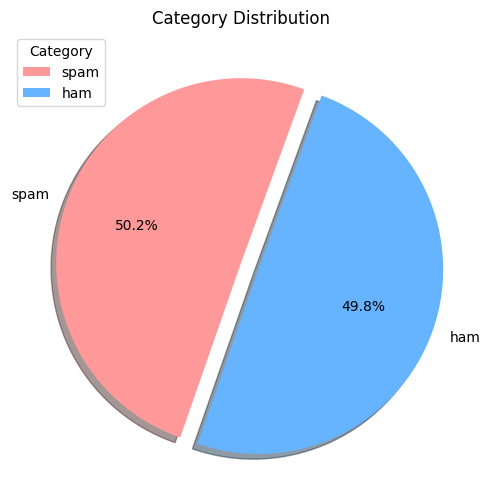

In [ ]:
plt.figure(figsize=(6,6))
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)
plt.pie(x=data['Category'].value_counts().values, labels=['spam', 'ham'],
        autopct='%.1f%%', startangle=70, explode=explode, colors=colors, shadow=True)
plt.legend(title="Category", loc="upper left")
plt.title("Category Distribution")
plt.show()

Pie Chart di atas menunjukkan adanya keseimbangan jumlah antara pesan ham dan pesan spam dalam dataset. Dengan adanya keseimbangan data, tidak diperlukan teknik resampling. Resampling adalah sebuah teknik pembuatan sample baru dengan menggunakan sampel yang sudah tersedia. Dengan demikian, data yang digunakan adalah 574 pesan spam dan 569 pesan ham.

<ipython-input-60-6ae3b527c6ce>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




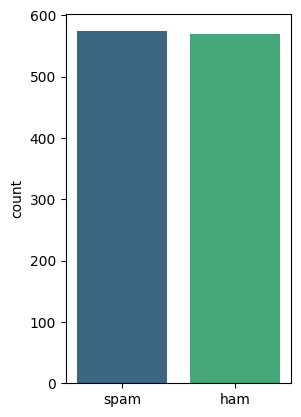

In [ ]:
plt.subplot(1, 2, 2)
sns.barplot(x = data['Category'].unique(), y = data['Category'].value_counts(), palette= 'viridis', legend = False)

plt.show()

# **Data Preprocessing**

In [ ]:
data

,Category,Message
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...
...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad..."
1140,ham,"nama1, minta database kamu sama view dan contr..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...


Dalam melakukan text classification, data yang diperoleh harus melalui beberapa tahapan text preprocessing. Text preprocessing bertujuan untuk membersihkan dan mempersiapkan data teks agar dapat diproses lebih lanjut oleh model. Terdapat beberapa tahapan text preprocessing yang akan dilakukan yaitu mengubah data menjadi huruf kecil, menghapus url atau link, menghapus punctuations (tanda baca), menghapus angka, stemming, split data, tokenization, dan menghapus stopwords.


## To Lowercase

In [ ]:
print(data["Message"].iloc[2])

def convert_lowercase(text):
    text = text.lower()
    return text

data['clean_message'] = data['Message'].apply(convert_lowercase)

data["clean_message"].iloc[2]

Kalau mau bikin model/controller mending per apa y?


'kalau mau bikin model/controller mending per apa y?'

In [ ]:
data

,Category,Message,clean_message
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth: simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...,kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama1. semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...
...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...","semangat yang ibu gita, ibu putri dan bapak ad..."
1140,ham,"nama1, minta database kamu sama view dan contr...","nama1, minta database kamu sama view dan contr..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapatkan gratis 1 cappuccino (hot/ice) & freza...


Berdasarkan hasil tersebut, terlihat bahwa data telah mengalami proses preprocessing. Pertama, teks telah diubah menjadi huruf kecil untuk memastikan konsistensi dan menghindari perbedaan yang disebabkan oleh kapitalisasi.

## Remove URLs

In [ ]:
print(data["Message"].iloc[0])
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

data['clean_message'] = data['clean_message'].apply(remove_url)
data["clean_message"].iloc[0]

Plg Yth: Simcard anda mendptkan bonus poin plus-plus 555 dr:PT.INDOSAT pin anda:277fg49 u/info klik di www.indosat-555.blogspot.com atau Hub:021-3338-0074.


'plg yth: simcard anda mendptkan bonus poin plus-plus 555 dr:pt.indosat pin anda:277fg49 u/info klik di  atau hub:021-3338-0074.'

In [ ]:
data

,Category,Message,clean_message
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth: simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...,kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama1. semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...
...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...","semangat yang ibu gita, ibu putri dan bapak ad..."
1140,ham,"nama1, minta database kamu sama view dan contr...","nama1, minta database kamu sama view dan contr..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapatkan gratis 1 cappuccino (hot/ice) & freza...


Proses preprocessing juga mencakup penghapusan URL atau link yang tidak relevan dengan analisis teks. Berdasarkan hasil tersebut, terlihat bahwa link yang ada pada data sudah dihapus. Sebagai contohnya, URL "www.indosat-555.blogspot.com" dihapus karena tidak memberikan kontribusi berarti terhadap klasifikasi pesan sebagai spam atau ham.


## Remove Punctuations

In [ ]:
print(data["Message"].iloc[6])
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

data['clean_message']= data['clean_message'].apply(lambda x: remove_punctuations(x))
data["clean_message"].iloc[6]

PESAN RESMI Selamat NO Simcard anda M-dptkam hadiah cek.Rp.35juta dr TRI CARE pin:7Y7R8K9Z info keik: www.id-tricare2016.blogspot.com


'pesan resmi selamat no simcard anda mdptkam hadiah cekrp35juta dr tri care pin7y7r8k9z info keik '

In [ ]:
data

,Category,Message,clean_message
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth simcard anda mendptkan bonus poin plus...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung
2,ham,Kalau mau bikin model/controller mending per a...,kalau mau bikin modelcontroller mending per apa y
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama1 semoga selalu menempuh hidup yan...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...
...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm buletdatar atau yg pgn ikutan debat...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",semangat yang ibu gita ibu putri dan bapak adi...
1140,ham,"nama1, minta database kamu sama view dan contr...",nama1 minta database kamu sama view dan contro...
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapatkan gratis 1 cappuccino hotice freza set...


Berdasarkan hasil tersebut, terlihat bahwa tanda baca telah dihapus untuk mengurangi noise dalam data. Hal ini termasuk penghapusan tanda baca seperti titik dua, tanda hubung, tanda seru, tanda tanya, dan tanda kurung.

## Remove All Digits

In [ ]:
print(data["Message"].iloc[-2])
data['clean_message'] = data['clean_message'].apply(lambda x:re.sub('[\d]','',x))
data["clean_message"].iloc[-2]

Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza, setiap transaksi min Rp75Rb di EXCELSO Cafe Semarang, Yogya, Solo sd 9 Agust 13. Tunjukkan SMS kpd petugas


'dapatkan gratis  cappuccino hotice  freza setiap transaksi min rprb di excelso cafe semarang yogya solo sd  agust  tunjukkan sms kpd petugas'

In [ ]:
data

,Category,Message,clean_message
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth simcard anda mendptkan bonus poin plus...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung
2,ham,Kalau mau bikin model/controller mending per a...,kalau mau bikin modelcontroller mending per apa y
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama semoga selalu menempuh hidup yang...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...
...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm buletdatar atau yg pgn ikutan debat...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",semangat yang ibu gita ibu putri dan bapak adi...
1140,ham,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapatkan gratis cappuccino hotice freza seti...


Berdasarkan hasil tersebut, terlihat bahwa angka-angka dalam teks yang tidak relevan juga telah dihapus. Sebagai contohnya pada angka "277fg49" dan "021-3338-0074" dalam contoh pesan spam di atas telah dihilangkan karena tidak memberikan informasi penting untuk klasifikasi. Penghapusan angka ini membantu mengurangi noise dan memastikan bahwa model dapat berfokus pada konten teks yang lebih relevan.

## Stemming

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install Sastrawi

In [ ]:
# Import library
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
print(data["Message"].iloc[2])
def perform_stemming(text):
    stemmer = StemmerFactory().create_stemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['clean_message'] = data['clean_message'].apply(perform_stemming)
data["clean_message"].iloc[2]

Kalau mau bikin model/controller mending per apa y?


'kalau mau bikin modelcontroller mending per apa y'

In [ ]:
data

,Category,Message,clean_message
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth simcard anda mendptkan bonus poin plus...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung
2,ham,Kalau mau bikin model/controller mending per a...,kalau mau bikin modelcontroller mending per apa y
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama moga selalu tempuh hidup yang bah...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkat nilai isi ulang anda lanjut minimal rp...
...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm buletdatar atau yg pgn ikut debat k...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",semangat yang ibu gita ibu putri dan bapak adi...
1140,ham,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapat gratis cappuccino hotice freza tiap tran...


Proses stemming dilakukan untuk mengurangi kata-kata ke bentuk dasar sehingga berbagai variasi dari kata yang sama diperlakukan sebagai satu fitur yang sama oleh model. Berdasarkan hasil diatas, dapat terlihat bahwa teks pada data telah diubah ke kata dasar.

## Split Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
x = data["clean_message"] #data yang sudah dibersikan yang akan dipakai

# Apply label encoding to 'Category' column
labelencoder = preprocessing.LabelEncoder()
data['Category'] = labelencoder.fit_transform(data['Category'])

# Extract the target labels after encoding
y = data['Category'].values


# Split data menjadi training set dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [ ]:
print("Jumlah data x_train:", len(x_train))
print("Jumlah data x_test:", len(x_test))
print("Jumlah data y_train:", len(y_train))
print("Jumlah data y_test:", len(y_test))

Jumlah data x_train: 914
Jumlah data x_test: 229
Jumlah data y_train: 914
Jumlah data y_test: 229


Setelah data melalui tahapan text preprocessing, tahapan selanjutnya adalah melakukan split data. Split data adalah proses membagi dataset menjadi dua bagian yaitu data training dan data testing. Tujuan utama dari split data adalah untuk memastikan bahwa model yang dibangun dapat dievaluasi dengan benar. Data dibagi menjadi 80% data training dan 20% data testing dari 1143 baris sehingga model akan dilatih menggunakan data training yang terdiri dari 914 pesan dan model akan diuji menggunakan data testing yang terdiri dari 229 pesan.

## Tokenization

In [ ]:
x_train_tokens = [word_tokenize(text) for text in x_train]
x_train_tokens

[['bebas',
  'pulsa',
  'ambil',
  'bonus',
  'di',
  'gratis',
  'dptkan',
  'gratis',
  'nelpon',
  'atau',
  'internetas',
  'atau',
  'promo',
  'lain',
  'sesuai',
  'hobi'],
 ['kek', 'pernah', 'liat', 'undang', 'di', 'prodi'],
 ['besok', 'jam', 'berapaa', 'harus', 'jadi', 'ih', 'udah', 'kali', 'skip'],
 ['nikmat',
  'double',
  'kuota',
  'promo',
  'gbg',
  'di',
  'jaring',
  'data',
  'kuat',
  'unlimited',
  'nelpsms',
  'jam',
  'dgn',
  'pkt',
  'freedom',
  'combo',
  'tekan',
  'atau',
  'indosatooredoocomfreedom'],
 ['pesan',
  'mohon',
  'transfer',
  'rp',
  'ke',
  'bni',
  'account',
  'belum',
  'jun',
  'mohon',
  'periksa',
  'email',
  'anda',
  'untuk',
  'info',
  'lebih',
  'lanjut'],
 ['lebih',
  'hemat',
  'langgan',
  'paket',
  'data',
  'minggu',
  'cuma',
  'rp',
  'cara',
  'gampang',
  'kok',
  'cukup',
  'ketik',
  'kuotaspasik',
  'krm',
  'sms',
  'ke'],
 ['belum', 'de', 'saya', 'kagi', 'nyoba', 'ngejar'],
 ['waktu',
  'itu',
  'malas',
  'sep',
  '

In [ ]:
x_test_tokens = [word_tokenize(text) for text in x_test]
x_test_tokens

[['isi',
  'ulang',
  'kuota',
  'gb',
  'hasil',
  'dan',
  'kuota',
  'tlh',
  'tambah',
  'nikmat',
  'juga',
  'bonus',
  'nelpon',
  'ke',
  'semua',
  'tri',
  'rprb',
  'cek',
  'bonus',
  'di',
  'atau',
  'bimatri'],
 ['layan',
  'vip',
  'games',
  'rpsms',
  'xmgg',
  'sdh',
  'diperpanjangnikmati',
  'layan',
  'sini',
  'stop',
  'cs'],
 ['topup',
  'pulsa',
  'rp',
  'hasil',
  'via',
  'transfer',
  'atm',
  'bni',
  'kode',
  'trx',
  'pulsa',
  'anda',
  'saat',
  'ini',
  'rp',
  'terima',
  'kasih',
  'telah',
  'guna',
  'indosat',
  'ooredoo'],
 ['ok',
  'minta',
  'yang',
  'data',
  'dummy',
  'diagnosapasien',
  'ya',
  'punten',
  'makasih'],
 ['yuk',
  'ikut',
  'akun',
  'dakwah',
  'cara',
  'ketik',
  'ikut',
  'spasi',
  'akucintaislam',
  'kirim',
  'ke'],
 ['slmtno',
  'anda',
  'mndptkn',
  'hadiah',
  'grand',
  'prize',
  'uang',
  'rpjtdr',
  'telkomsel',
  'poin',
  'nopingjk',
  'hub',
  'call',
  'center',
  'kirim',
  'tsel'],
 ['bonus',
  'rp',


Proses tokenization dilakukan untuk memecah teks menjadi unit-unit kata atau token sehingga lebih mudah untuk dianalisis. Berdasarkan hasil tersebut, terlihat bahwa data sudah diubah menjadi bentuk token baik pada data training maupun data testing.

## Filtering / Remove Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('indonesian')

In [ ]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
x_train_filter = [[word for word in sentence if word not in stop_words] for sentence in x_train_tokens]
x_train_filter

[['bebas',
  'pulsa',
  'ambil',
  'bonus',
  'gratis',
  'dptkan',
  'gratis',
  'nelpon',
  'internetas',
  'promo',
  'sesuai',
  'hobi'],
 ['kek', 'liat', 'undang', 'prodi'],
 ['besok', 'jam', 'berapaa', 'ih', 'udah', 'kali', 'skip'],
 ['nikmat',
  'double',
  'kuota',
  'promo',
  'gbg',
  'jaring',
  'data',
  'kuat',
  'unlimited',
  'nelpsms',
  'jam',
  'dgn',
  'pkt',
  'freedom',
  'combo',
  'tekan',
  'indosatooredoocomfreedom'],
 ['pesan',
  'mohon',
  'transfer',
  'rp',
  'bni',
  'account',
  'jun',
  'mohon',
  'periksa',
  'email',
  'info'],
 ['hemat',
  'langgan',
  'paket',
  'data',
  'minggu',
  'rp',
  'gampang',
  'ketik',
  'kuotaspasik',
  'krm',
  'sms'],
 ['de', 'kagi', 'nyoba', 'ngejar'],
 ['malas', 'sep', 'hihi', 'lihat', 'jd', 'rapih', 'aja'],
 ['eks',
  'loh',
  'internetan',
  'pake',
  'volume',
  'ultima',
  'mbhr',
  'hrga',
  'rp',
  'rb',
  'tariflokasi',
  'cek',
  'tselmefl'],
 ['ribet',
  'bolak',
  'cek',
  'pulsacek',
  'sisa',
  'kuota',
  

In [ ]:
x_test_filter = [[word for word in sentence if word not in stop_words] for sentence in x_test_tokens]
x_test_filter

[['isi',
  'ulang',
  'kuota',
  'gb',
  'hasil',
  'kuota',
  'tlh',
  'nikmat',
  'bonus',
  'nelpon',
  'tri',
  'rprb',
  'cek',
  'bonus',
  'bimatri'],
 ['layan',
  'vip',
  'games',
  'rpsms',
  'xmgg',
  'sdh',
  'diperpanjangnikmati',
  'layan',
  'stop',
  'cs'],
 ['topup',
  'pulsa',
  'rp',
  'hasil',
  'via',
  'transfer',
  'atm',
  'bni',
  'kode',
  'trx',
  'pulsa',
  'rp',
  'terima',
  'kasih',
  'indosat',
  'ooredoo'],
 ['ok', 'data', 'dummy', 'diagnosapasien', 'ya', 'punten', 'makasih'],
 ['yuk', 'akun', 'dakwah', 'ketik', 'spasi', 'akucintaislam', 'kirim'],
 ['slmtno',
  'mndptkn',
  'hadiah',
  'grand',
  'prize',
  'uang',
  'rpjtdr',
  'telkomsel',
  'poin',
  'nopingjk',
  'hub',
  'call',
  'center',
  'kirim',
  'tsel'],
 ['bonus', 'rp', 'kirim', 'sms', 'x', 'bonus', 'khusus', 't'],
 ['rekening', 'bank', 'mandiri', 'an', 'ali', 'syamsudin', 'rek'],
 ['transfer', 'bri', 'aja', 'an', 'angga', 'prastia', 'no', 'rek'],
 ['kang', 'nama', 'tuh', 'menang', 'milyar

Penghapusan stopwords dilakukan untuk menghilangkan kata-kata umum yang tidak memberikan nilai signifikan dalam analisis teks. Berdasarkan hasil diatas, terlihat bahwa stopwords sudah dihapus baik pada data training maupun data testing.

# **Exploratory Data Analysis (EDA)**

Setelah melakukan text preprocessing, langkah selanjutnya adalah Exploratory Data Analysis (EDA) yang bertujuan untuk memahami dan menganalisis karakteristik dasar dari teks yang tersedia sebelum melakukan analisis lebih lanjut. Pada proses EDA disini menampilkan kata - kata yang paling sering muncul di kategori ‘SPAM’ dan ‘HAM’ dalam bentuk visualisasi. Berikut adalah contoh 10 kata beserta jumlah kata yang sering muncul dalam pesan ‘SPAM’ dalam bentuk tabel.


## Frequent Words in 'SPAM'

In [ ]:
all_spam_words = []
for sentence in data[data['Category'].isin(['spam', 1])]['clean_message'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)
print(all_spam_words)
df = pd.DataFrame(Counter(all_spam_words).most_common(50), columns= ['Word', 'Frequency'])
df.style.background_gradient(cmap='Purples')

['plg', 'yth', 'simcard', 'mendptkan', 'bonus', 'poin', 'plusplus', 'drptindosat', 'pin', 'andafg', 'uinfo', 'klik', 'hub', 'tingkat', 'nilai', 'isi', 'ulang', 'minimal', 'rpribu', 'paket', 'murah', 'pas', 'info', 'uang', 'trnsfer', 'bni', 'aja', 'an', 'rastina', 'norek', 'klo', 'sdh', 'd', 'trnsfer', 'sms', 'aja', 'no', 'trmks', 'pesan', 'resmi', 'selamat', 'no', 'simcard', 'mdptkam', 'hadiah', 'cekrpjuta', 'dr', 'tri', 'care', 'pinyrkz', 'info', 'keik', 'sy', 'rudi', 'jambi', 'bgi', 'tman', 'yg', 'kalah', 'togel', 'kalah', 'bandar', 'hub', 'mbah', 'ros', 'jamin', 'tembus', 'sy', 'sdh', 'bukti', 'd', 'jt', 'tri', 'bonus', 'pulsa', 'pernuh', 'berkah', 'isi', 'pulsa', 'min', 'rb', 'dapet', 'bonus', 'pulsa', 'rb', 'utk', 'nelp', 'nmr', 'tri', 'ayo', 'buru', 'isi', 'pulsa', 't', 'kena', 'uang', 'kontra', 'terusin', 'harap', 'bpk', 'suyono', 'nomor', 'hp', 'shd', 'sya', 'kuasa', 'penuh', 'maaf', 'sms', 'surat', 'putus', 'tri', 'care', 'indonesia', 'noxv', 'pinpemenang', 'ytg', 'hadiah', 'c

,Word,Frequency
0,info,144
1,hadiah,121
2,klik,103
3,sms,103
4,no,103
5,pin,99
6,cek,95
7,rp,95
8,pulsa,91
9,paket,84


Selain dengan tabel, terdapat juga visualisasi dalam bentuk tree map. Dalam bentuk tree map, hasil visualisasinya lebih berwarna dan dapat disimpulkan dari bentuk kota beserta warnanya. Contoh visualisasi dalam bentuk tree map pada kategori ‘SPAM’.

In [ ]:
fig = px.treemap(df, path=['Word'], values='Frequency', title='Tree of Most Common Words', color='Frequency')
fig.show()

Terdapat juga visualisasi dalam bentuk bar chart. Hasil visualisasi dengan bar chart juga dapat dimengerti dengan mudah hanya melalui bar / batang mana yang paling panjang. Semakin panjang bar berarti semakin banyak kata tersebut muncul, begitu juga sebaliknya. Contoh visualisasi bar chart pada kategori ‘SPAM’.


In [ ]:
fig = px.bar(
    df,
    x="Frequency",
    y="Word",
    title='Common Words in SPAM',
    width=700,
    height=700,
    color='Frequency',  # Set the color based on the count of common words
    color_continuous_scale='YlGnBu',  # Specify a color scale
)
fig.update_layout(
    xaxis_title="Frequency",
    yaxis_title=None,  # Remove the y-axis title
    title_font=dict(size=40),  # Increase title font size
    font=dict(size=20),  # Increase general text font size
)


fig.update_xaxes(showgrid=False)  # Hide x-axis grid lines
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')  # Show and style y-axis grid lines

fig.show()

Dan yang terakhir terdapat visualisasi dalam bentuk Word Cloud. Word Cloud menunjukan frekuensi kemunculan kata - kata. Ukuran kata yang lebih besar menunjukkan kata yang lebih sering muncul dan sebaliknya jika kata tersebut tidak sering muncul akan sangat kecil ukurannya sehingga hal ini dapat membuat kesulitan untuk mengetahui kata apa yang termasuk kategori ‘SPAM’ tetapi muncul sedikit. Contoh visualisasi dalam bentuk Word Cloud pada kategori ‘SPAM’.


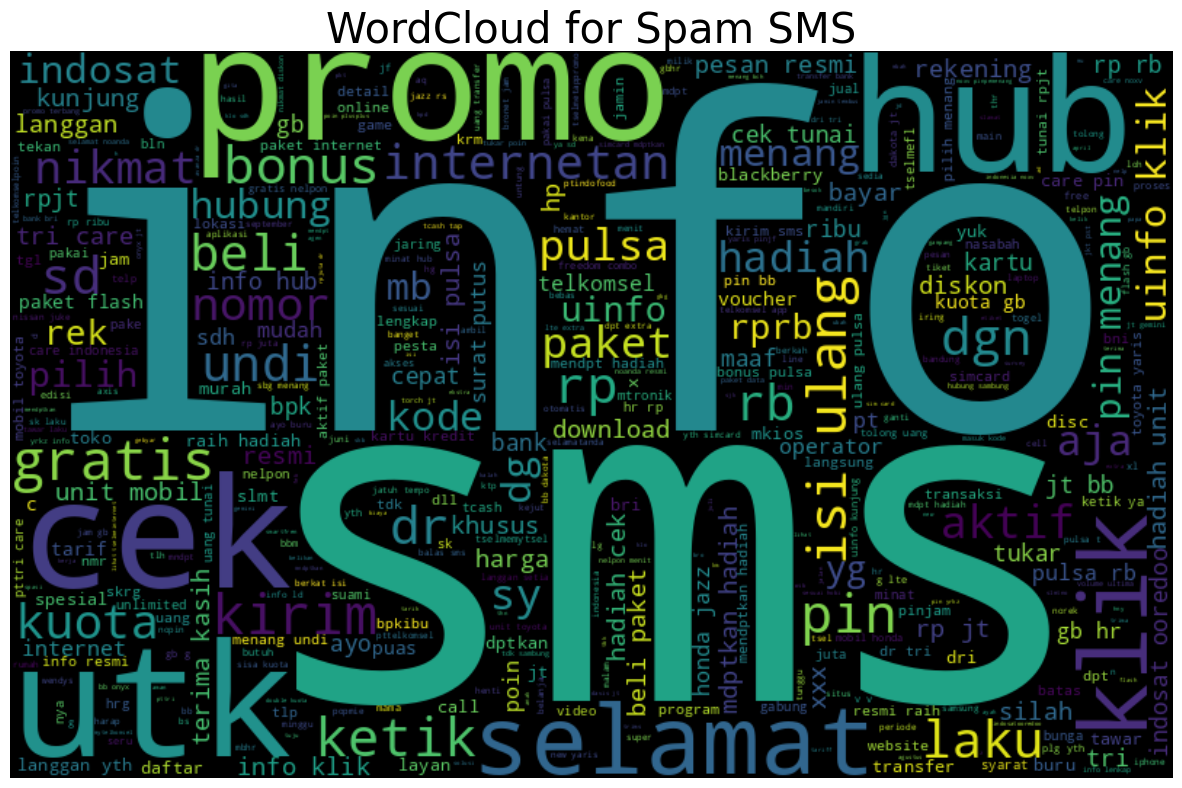

In [ ]:
text = " ".join(data[data['Category'].isin(['spam', 1])]['clean_message'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 500, width = 800,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('WordCloud for Spam SMS', fontsize=30)
plt.axis('off')
plt.show()

Dari hasil menggunakan empat visualisasi yang berbeda, dapat dilihat kata-kata yang paling sering muncul pada kategori ‘SPAM’ semuanya konsisten contohnya yaitu.
[ 'info', 'hadiah', 'pin', 'no', 'klik', 'sms', 'cek', 'menang', 'rp', 'hub', 'paket', 'gb', 'tri', 'dr'].


## Frequent Words in 'HAM'

Pada kategori ‘HAM’, visualisasi yang digunakan sama seperti kategori ‘SPAM’. Untuk model visualisasi pertama yaitu dengan menggunakan tabel.  Semakin banyak kata tersebut muncul, semakin atas juga kata tersebut berada pada tabel. Berikut hasil sepuluh kata terbanyak muncul dalam bentuk tabel beserta jumlah katanya dalam kategori ‘HAM’.

In [ ]:
all_spam_words = []
for sentence in data[data['Category'].isin(['ham', 0])]['clean_message'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)
df = pd.DataFrame(Counter(all_spam_words).most_common(50), columns= ['Word', 'Frequency'])
df.style.background_gradient(cmap='Blues')

,Word,Frequency
0,yg,108
1,nama,95
2,aja,70
3,ya,66
4,ga,55
5,nya,49
6,kalo,39
7,jam,38
8,teh,30
9,maaf,27


Kemudian terdapat visualisasi dalam bentuk tree map. Tree map menunjukkan frekuensi kemunculan kata - kata dalam bentuk dataset. Setiap kotak mewakili sebuah kata dan ukuran kotak menunjukkan seberapa sering kata tersebut muncul, dimana semakin besar kotaknya, semakin sering kata tersebut muncul. Contoh visualisasi dalam bentuk tree map pada kategori ‘HAM’.

In [ ]:
fig = px.treemap(df, path=['Word'], values='Frequency', title='Tree of Most Common Words', color='Word')
fig.show()

Serta dalam bentuk bar chart dimana menampilkan kata-kata dengan frekuensi kemunculannya dalam bentuk batang/bar. Kata yang paling sering muncul, bar/batangnya akan lebih panjang dibanding dengan kata yang lebih sedikit muncul. Contoh visualisasi bar chart untuk kategori ‘HAM’.

In [ ]:
fig = px.bar(
    df,
    x="Frequency",
    y="Word",
    title='Most Common Negative Words',
    width=700,
    height=700,
    color='Frequency',  # Set the color based on the count of common words
    color_continuous_scale='YlOrRd',  # Choose the 'YlGnBu' color scale
)

fig.show()

Terakhir visualisasi dalam bentuk Word Cloud. Kata yang paling sering muncul, ukurannya akan lebih besar dibanding dengan kata yang lebih sedikit munculnya. Akan tetapi hal ini dapat membuat kata tersebut tidak terlihat karena terlalu kecil ukurannya. Contoh visualisasi word cloud dalam kategori ‘HAM’.

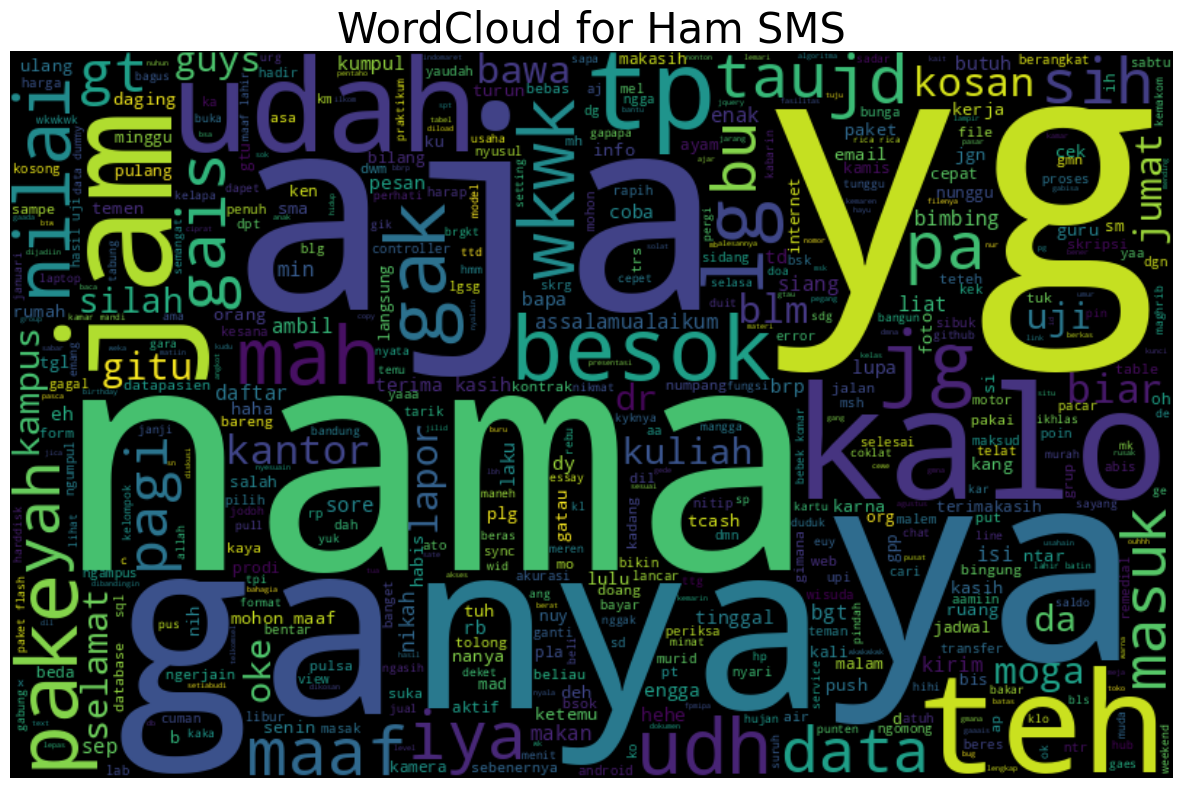

In [ ]:
text = " ".join(data[data['Category'].isin(['ham', 0])]['clean_message'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 500, width = 800,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('WordCloud for Ham SMS', fontsize=30)
plt.axis('off')
plt.show()

Pada kategori ‘HAM’, kata - kata yang sering muncul juga konsisten pada semua bentuk visualisasi. Contoh kata yang sering muncul pada kategori ‘HAM’ yaitu
[ 'yg', 'nama', 'aja', 'ya', 'ga', 'nya', 'kalo', 'jam', 'teh', 'maaf', 'udah', 'tp', 'besok', 'pake']. Dari hasil visualisasi pada proses EDA ini memudahkan untuk melihat dan mengetahui kata - kata apa saja yang sering muncul.


# Text Representation

## TF-IDF

Text representation merupakan salah satu masalah mendasar dalam task text mining. Hal ini bertujuan untuk merepresentasikan dokumen teks yang tidak terstruktur secara numerik agar dapat dihitung secara matematis. Melalui text representation, kita dapat mengubah input berupa string menjadi bentuk vektor supaya dapat dilakukan perhitungan dot product untuk keperluan deep learning. Salah satu teknik representasi teks yaitu TF-IDF.

TF-IDF merupakan representasi teks dengan memberikan weight kepada setiap token atau kata, sehingga mampu memberikan informasi akan seberapa penting kata tersebut dalam dataset. TF-IDF adalah hasil perkalian dari term frequency, yaitu seberapa sering suatu term muncul dalam dokumen atau sample data dan inverse document frequency, yaitu untuk mengurangi bobot suatu term jika kemunculannya banyak tersebar di seluruh dokumen.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Text Preparation

Di dalam proses vektorisasi TF-IDF menggunakan TfidfVectorizer(), sebetulnya sudah terjadi proses tokenisasi secara implisit atau tidak langsung di dalam modulnya. Oleh karena itu, seharusnya input dari TfidfVectorizer() berupa data yang sudah melewati proses cleaning. Namun, pada tahapan sebelumnya, kita sudah melakukan tokenisasi menggunakan word_tokenize() terhadap data training dan data testing. Sehingga solusi yang ditawarkan adalah menggabungkan kembali terlebih dahulu token-token tersebut menjadi sebuah kesatuan kalimat dengan menggunakan join(), lalu memasukkannya sebagai parameter yang akan di vektorisasi TF-IDF.

In [ ]:
x_train_compiled = [' '.join(sentence) for sentence in x_train_filter]
x_test_compiled = [' '.join(sentence) for sentence in x_test_filter]

In [ ]:
x_train_compiled

['bebas pulsa ambil bonus gratis dptkan gratis nelpon internetas promo sesuai hobi',
 'kek liat undang prodi',
 'besok jam berapaa ih udah kali skip',
 'nikmat double kuota promo gbg jaring data kuat unlimited nelpsms jam dgn pkt freedom combo tekan indosatooredoocomfreedom',
 'pesan mohon transfer rp bni account jun mohon periksa email info',
 'hemat langgan paket data minggu rp gampang ketik kuotaspasik krm sms',
 'de kagi nyoba ngejar',
 'malas sep hihi lihat jd rapih aja',
 'eks loh internetan pake volume ultima mbhr hrga rp rb tariflokasi cek tselmefl',
 'ribet bolak cek pulsacek sisa kuota internetmu download aja aplikasi mycare x klik mudah akses',
 'bayar transfer harap hubung sayabpk ardiansah no tlp ubah bayar',
 'maaf keyword masuk salah info hub call center',
 'gais lapor bimbing bimbing lapang',
 'info resmi selamat pilih sbgi menang semarak undi ptindofood indonesia no pin dhi info pinhadiah klik',
 'kirim pulsa ewu no mas agus',
 'jemput poskamling cilimus dee',
 'kantin

In [ ]:
x_test_compiled

['isi ulang kuota gb hasil kuota tlh nikmat bonus nelpon tri rprb cek bonus bimatri',
 'layan vip games rpsms xmgg sdh diperpanjangnikmati layan stop cs',
 'topup pulsa rp hasil via transfer atm bni kode trx pulsa rp terima kasih indosat ooredoo',
 'ok data dummy diagnosapasien ya punten makasih',
 'yuk akun dakwah ketik spasi akucintaislam kirim',
 'slmtno mndptkn hadiah grand prize uang rpjtdr telkomsel poin nopingjk hub call center kirim tsel',
 'bonus rp kirim sms x bonus khusus t',
 'rekening bank mandiri an ali syamsudin rek',
 'transfer bri aja an angga prastia no rek',
 'kang nama tuh menang milyar hahaha kemakom prestasi',
 'blm dpt ttd nama duluan aja nyusul',
 'suratkeputusan tricare indonesia no xv pin menang jf toyota yaris uinfo kunjung blogspotcom',
 'bpkibu yth milik noxxx pin undi resmi mdptkan rpjt cs klik carecom',
 'wihh nyimper koper dmn motor gigi',
 'ayam aja paket isi ap aja',
 'etiket pswt hrga promo terbang domestik internasional reservasi tiket mudah praktis 

### TF-IDF Model Building

In [ ]:
# Menginisialisasi TfidfVectorizer dengan min_df=3
tfidf_vectorizer = TfidfVectorizer(min_df=3)

Parameter TF-IDF yang digunakan yaitu min_df atau jumlah document frequency paling sedikit yaitu 3. Parameter ini mengatur jumlah minimum suatu term harus muncul dalam dataset agar diperhitungkan sebagai bagian dari vektorisasi TF-IDF. Artinya, hanya kata-kata yang muncul di setidaknya 3 dokumen dalam korpus akan dimasukkan dalam perhitungan dan sisanya akan diabaikan. Tujuannya agar kata yang tidak signifikan tidak terlibat pada proses vektorisasi.

In [ ]:
# Membuat TF-IDF pada x_train_tokens
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_compiled)
x_train_tfidf

<914x709 sparse matrix of type '<class 'numpy.float64'>'
	with 7011 stored elements in Compressed Sparse Row format>

In [ ]:
TFIDF_train = pd.DataFrame(x_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
TFIDF_train

,aamiin,abis,ad,agen,agustus,air,aj,aja,ajar,akses,...,yank,yaris,yaudah,yg,your,yrkz,ytg,yth,ythsaya,yuk
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.316466,0.0,0.0,...,0.0,0.0,0.0,0.586423,0.0,0.0,0.0,0.0,0.0,0.0
910,0.0,0.0,0.0,0.348141,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
911,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
912,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.144803,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Membuat TF-IDF pada x_test_compiled
x_test_tfidf = tfidf_vectorizer.transform(x_test_compiled)
x_test_tfidf

<229x709 sparse matrix of type '<class 'numpy.float64'>'
	with 1560 stored elements in Compressed Sparse Row format>

In [ ]:
TFIDF_test = pd.DataFrame(x_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
TFIDF_test

,aamiin,abis,ad,agen,agustus,air,aj,aja,ajar,akses,...,yank,yaris,yaudah,yg,your,yrkz,ytg,yth,ythsaya,yuk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.532127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.157459,0.0,0.0,0.0,0.000000,0.0,0.000000
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.274709,0.0,0.000000
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [ ]:
print("Dimensi x_train_tfidf setelah TF-IDF:", x_train_tfidf.shape)
print("Dimensi x_test_tfidf setelah TF-IDF:", x_test_tfidf.shape)

Dimensi x_train_tfidf setelah TF-IDF: (914, 709)
Dimensi x_test_tfidf setelah TF-IDF: (229, 709)


Setelah melewati proses vektorisasi, diperoleh vektor TF-IDF dengan bentuk data frame yang memiliki ukuran (panjang baris) sama dengan data label, yaitu 914 untuk data training dan 229 untuk data training. Hal ini akan sangat memudahkan ketika kita akan melakukan modeling, fitting, dan predict. 709 kolom merupakan jumlah token unik yang diambil dari seluruh kumpulan data. Sedangkan nilai di dalam sel menggambarkan seberapa penting token tersebut untuk suatu data.

## Doc2Vec

Representasi kata di mana representasi akan kontekstual, yakni berhubungan dengan kata-kata yang ada di sekitarnya disebut sebagai word embedding. Salah satu teknik word embedding yang banyak digunakan yaitu Doc2Vec. Doc2Vec merupakan teknik yang digunakan untuk menghasilkan representasi vektor dari sejumlah teks atau dokumen. Teknik ini merupakan perluasan dari Word2Vec, yang akan merepresentasikan setiap kata dengan satu sequence unik berisi bilangan biner. Dalam Word2Vec, setiap kata direpresentasikan sebagai vektor. Sedangkan dalam Doc2Vec, setiap dokumen juga direpresentasikan sebagai vektor. Doc2Vec mencoba menangkap makna dari seluruh dokumen, bukan hanya makna dari masing-masing individu kata di dalamnya.


### Text Data Preparation

In [ ]:
x_train_sentences = [' '.join(sentence) for sentence in x_train_filter]
x_test_sentences = [' '.join(sentence) for sentence in x_test_filter]

In [ ]:
x_train_sentences

['bebas pulsa ambil bonus gratis dptkan gratis nelpon internetas promo sesuai hobi',
 'kek liat undang prodi',
 'besok jam berapaa ih udah kali skip',
 'nikmat double kuota promo gbg jaring data kuat unlimited nelpsms jam dgn pkt freedom combo tekan indosatooredoocomfreedom',
 'pesan mohon transfer rp bni account jun mohon periksa email info',
 'hemat langgan paket data minggu rp gampang ketik kuotaspasik krm sms',
 'de kagi nyoba ngejar',
 'malas sep hihi lihat jd rapih aja',
 'eks loh internetan pake volume ultima mbhr hrga rp rb tariflokasi cek tselmefl',
 'ribet bolak cek pulsacek sisa kuota internetmu download aja aplikasi mycare x klik mudah akses',
 'bayar transfer harap hubung sayabpk ardiansah no tlp ubah bayar',
 'maaf keyword masuk salah info hub call center',
 'gais lapor bimbing bimbing lapang',
 'info resmi selamat pilih sbgi menang semarak undi ptindofood indonesia no pin dhi info pinhadiah klik',
 'kirim pulsa ewu no mas agus',
 'jemput poskamling cilimus dee',
 'kantin

In [ ]:
x_test_sentences

['isi ulang kuota gb hasil kuota tlh nikmat bonus nelpon tri rprb cek bonus bimatri',
 'layan vip games rpsms xmgg sdh diperpanjangnikmati layan stop cs',
 'topup pulsa rp hasil via transfer atm bni kode trx pulsa rp terima kasih indosat ooredoo',
 'ok data dummy diagnosapasien ya punten makasih',
 'yuk akun dakwah ketik spasi akucintaislam kirim',
 'slmtno mndptkn hadiah grand prize uang rpjtdr telkomsel poin nopingjk hub call center kirim tsel',
 'bonus rp kirim sms x bonus khusus t',
 'rekening bank mandiri an ali syamsudin rek',
 'transfer bri aja an angga prastia no rek',
 'kang nama tuh menang milyar hahaha kemakom prestasi',
 'blm dpt ttd nama duluan aja nyusul',
 'suratkeputusan tricare indonesia no xv pin menang jf toyota yaris uinfo kunjung blogspotcom',
 'bpkibu yth milik noxxx pin undi resmi mdptkan rpjt cs klik carecom',
 'wihh nyimper koper dmn motor gigi',
 'ayam aja paket isi ap aja',
 'etiket pswt hrga promo terbang domestik internasional reservasi tiket mudah praktis 

### Doc2Vec Model Building

In [ ]:
from tqdm import tqdm
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
train_tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(x_train_sentences)]
d2v_model = Doc2Vec(dm = 1, dm_mean = 1, window = 5, min_count = 1, workers = 1, alpha = 0.065, min_alpha = 0.065)
d2v_model.build_vocab(tqdm(train_tagged))

100%|██████████| 914/914 [00:00<00:00, 120435.86it/s]


Dalam proses text representation menggunakan Doc2Vec, beberapa parameter diatur agar memperoleh hasil maksimum. Pertama, parameter dm dan dm_mean yaitu 1 menjelaskan bahwa metode training model yang digunakan yaitu Distributed Memory (PV-DM), dengan menggunakan rata-rata vektor dokumen. Jumlah window maksimum di mana kata-kata diprediksi dalam dokumen adalah 5 dengan jumlah thread yang digunakan adalah 1. Selanjutnya, kumpulan terms dalam data training yang sudah ditokenisasi akan membentuk suatu daftar kata menggunakan fungsi build_vocab().

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils import shuffle

In [ ]:
%%time
for epoch in range(30):
    d2v_model.train(shuffle(train_tagged), total_examples=len(train_tagged), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

CPU times: user 1.42 s, sys: 12.8 ms, total: 1.43 s
Wall time: 1.45 s


Model dilatih selama 30 epoch menggunakan data yang telah diacak pada setiap epoch. Selama seluruh epoch, training model menggunakan tingkat pembelajaran atau alpha yaitu sebesar 0.065 yang berkurang secara bertahap sebanyak 0.002 untuk setiap 1 epoch. Tujuannya yaitu agar learning rate berkurang secara bertahap dan model belajar dengan lebih baik seiring waktu. Setelah training Doc2Vec selesai, diperoleh ukuran kosakata dari model yaitu vektor dokumen berdimensi 100. Ukuran kosakata menunjukkan jumlah kata unik yang dipelajari model dari data training. Matriks embedding dibuat dengan ukuran (vocab_size + 1, 100), di mana 100 adalah dimensi vektor embedding. Setiap vektor embedding dari dokumen diambil dari model dan ditempatkan dalam matriks embedding.

In [ ]:
# Printing model details and vocabulary length
print(d2v_model)
vocab_size = len(d2v_model.wv.index_to_key)
print(vocab_size)

Doc2Vec<dm/m,d100,n5,w5,s0.001>
3126


Doc2Vec menghasilkan vektor embedding untuk setiap dokumen, yang menggambarkan representasi kontekstual dari dokumen tersebut dalam dimensi yang lebih rendah. Hal ini sangat memudahkan dalam modeling, fitting, dan predict, serta memberikan representasi yang lebih kaya dibandingkan TF-IDF yang hanya mengukur pentingnya kata dalam dokumen. Berikut adalah list vocab atau kata hasil dari Doc2Vec yang sudah diubah dalam bentuk data frame dengan 3126 baris kata.

In [ ]:
vocab = d2v_model.wv.index_to_key
vocab_df = pd.DataFrame(d2v_model.wv.index_to_key)
vocab_df

,0
0,info
1,yg
2,hadiah
3,sms
4,cek
...,...
3121,pinbfgs
3122,diapain
3123,jatoh
3124,gaperlu


Selanjutnya, diperoleh vektor berisikan representasi numerik dari setiap kata. Seperti yang sudah disampaikan sebelumnya, dimensi embedding yang digunakan saat memodelkan Doc2Vec adalah 100. Artinya, setiap token kata akan direpresentasikan dengan vektor berisikan 100 nilai. Berikut adalah contoh hasil Doc2Vec untuk kata pertama, yaitu “info”. Setiap nilai pada vektor ini akan merepresentasikan weight yang tepat supaya suatu kata bisa di mapping dengan baik.

In [ ]:
d2v_vectors = [d2v_model.wv.get_vector(word)for word in vocab]
d2v_vectors

[array([-0.22232717,  0.7392459 ,  0.03403539, -0.4559211 ,  0.32908535,
        -1.098256  ,  1.4062403 ,  1.0526068 ,  0.370121  , -1.1109241 ,
         0.65751255,  0.07951195, -0.7063682 , -0.43796396, -0.46289915,
        -0.5666893 ,  0.11173554, -0.65314674, -0.53007954, -0.37369183,
        -0.2621499 ,  0.07723355,  0.21044396, -0.50600696, -0.01731088,
        -0.28227398, -0.61960936, -0.6152446 , -0.33308706, -0.8526821 ,
         0.81575453,  0.7869214 ,  0.15085205, -0.8854549 , -0.60544646,
         0.04625835, -0.43005824,  0.22305109,  0.18980251, -0.8095495 ,
        -0.57311636,  0.11869843,  0.27550474,  0.06967467,  0.4793577 ,
        -0.25424746, -1.1916059 ,  0.2909101 ,  0.4660745 ,  0.00719667,
         0.09853308, -0.47089615,  0.2491669 , -0.27011582,  0.00428847,
         0.3622526 ,  0.9276821 ,  0.23554474, -0.29614437, -0.08584934,
         1.1577997 , -0.7434865 ,  0.565284  , -0.47774163, -0.88819873,
         0.98174113, -1.0527757 ,  1.3391604 , -0.1

In [ ]:
d2v_model.wv.get_vector(vocab[1])

array([-0.610078  , -0.0877536 ,  0.5869081 ,  0.40160468, -0.2138565 ,
       -1.015332  , -0.5024093 ,  0.12971127, -0.2935157 ,  0.11687714,
       -1.1667465 , -0.21799254,  0.26913399,  0.6823426 ,  0.5576316 ,
        0.75062644,  0.31437984,  0.21748371, -0.08339565, -1.3389479 ,
        0.8519829 ,  0.19005466,  0.6400811 ,  0.14432418,  0.2645563 ,
        0.15573028, -0.34886792, -0.64947754, -0.4010436 ,  0.2622837 ,
        0.41315788,  0.364039  , -0.15665351,  0.48977458,  0.18597269,
        1.3063012 , -0.17752528,  0.4871313 , -0.92480075, -0.67297304,
        0.964178  , -0.14123715, -0.24214765,  0.23204024, -0.68439776,
        0.3199264 ,  0.04712366, -0.00402307, -0.71350354,  0.7535674 ,
        0.39728928, -0.05770397, -0.15885383, -0.33345398, -0.869121  ,
        0.3308948 , -0.32918423, -0.07411167, -0.8724177 ,  0.79504466,
       -0.26842234,  1.168078  , -1.1581498 , -0.6580844 ,  0.1086389 ,
        0.38870612,  1.0025105 , -0.48831493, -0.34510487,  0.03

#### Measure Distance Between Vectors Using Cosine Similarity

Doc2Vec merepresentasikan kata dan dokumen berdasarkan konteks di mana kata-kata tersebut muncul. Kata yang muncul dalam konteks serupa menurut Doc2Vec akan memiliki vektor yang lebih dekat satu sama lain. Oleh karena itu, jarak antar vektor dapat digunakan untuk mengukur kemiripan suatu kata dengan kata lainnya. Misalnya, kita dapat mengetahui 10 kata yang memiliki kemiripan paling tinggi dengan kata “mohon” dan “info” menurut model Doc2Vec yang sebelumnya sudah diperoleh.


In [ ]:
similar_words_mohon = d2v_model.wv.most_similar(positive=['mohon'], topn=10)
similar_words_mohon

[('maaf', 0.8744332790374756),
 ('ratna', 0.8658305406570435),
 ('batin', 0.8609174489974976),
 ('nur', 0.84328293800354),
 ('pisaaaan', 0.8377675414085388),
 ('bu', 0.8372881412506104),
 ('remedial', 0.8295196294784546),
 ('lahir', 0.8264356255531311),
 ('doa', 0.8229967951774597),
 ('diteruskanbayar', 0.8131923079490662)]

Berikut adalah 10 kata yang paling mirip dengan kata “mohon”, diikuti dengan nilai cosine similarity nya. Cosine similarity berkisar di antara 0 sampai 1, dengan angka yang semakin mendekati 1 menunjukkan kemiripan yang lebih tinggi. Kata “maaf” memiliki kemiripan paling tinggi dengan kata “mohon”, dengan nilai kemiripan sebesar 0.874.

In [ ]:
similar_words_hadiah = d2v_model.wv.most_similar(positive=['info'], topn=10)
similar_words_hadiah

[('lengkap', 0.9445512890815735),
 ('rahasia', 0.896874189376831),
 ('bfgs', 0.8743748068809509),
 ('abbee', 0.8738572001457214),
 ('negara', 0.8688877820968628),
 ('yrkz', 0.8649330139160156),
 ('laptopdll', 0.8615772128105164),
 ('lnfo', 0.8536953330039978),
 ('yes', 0.8503975868225098),
 ('ladyticketwebscom', 0.8485751748085022)]

Berikut adalah 10 kata yang paling mirip dengan kata “info”, diikuti dengan nilai cosine similarity nya. Kata “lengkap” memiliki kemiripan paling tinggi dengan kata “info”, dengan nilai kemiripan sebesar 0.945.

# LSTM

Pada penelitian ini, telah diimplementasikan empat model arsitektur untuk dibandingkan, yaitu LSTM, Bi-LSTM, GRU, dan Bi-GRU. Keempat model ini akan digunakan untuk memprediksi apakah sebuah pesan SMS termasuk dalam kategori spam atau ham. Sebelumnya, telah digunakan dua metode text representation yang berbeda, yakni TF-IDF dan Doc2Vec.

## TF-IDF

In [ ]:
# Reshape TF-IDF vectors for LSTM input
x_train_tfidf_reshaped = x_train_tfidf.toarray().reshape((x_train_tfidf.shape[0], 1, x_train_tfidf.shape[1]))
x_test_tfidf_reshaped = x_test_tfidf.toarray().reshape((x_test_tfidf.shape[0], 1, x_test_tfidf.shape[1]))

### Architecture Modeling

In [ ]:
# Build the LSTM model
model_tfidf_lstm = Sequential()
model_tfidf_lstm.add(LSTM(128, input_shape=(x_train_tfidf_reshaped.shape[1], x_train_tfidf_reshaped.shape[2]), return_sequences=True))
model_tfidf_lstm.add(Dropout(0.5))
model_tfidf_lstm.add(LSTM(64))
model_tfidf_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_tfidf_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Print model summary
model_tfidf_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 1, 128)            429056    
                                                                 
 dropout_10 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_18 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 478529 (1.83 MB)
Trainable params: 478529 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


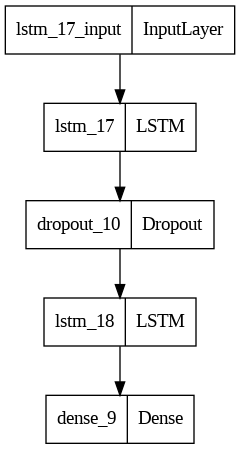

In [ ]:
from keras.utils import plot_model
plot_model(model_tfidf_lstm, to_file='model_lstm_tfidf.png')

Model LSTM ini terdiri dari dua lapisan LSTM dengan masing-masing 128 dan 64 unit. Lapisan LSTM pertama menghasilkan output sequences dan diikuti oleh lapisan dropout untuk mencegah overfitting. Lapisan LSTM kedua mengurangi output menjadi 64 unit dan diakhiri dengan lapisan dense dengan fungsi aktivasi sigmoid untuk melakukan binary classification, apakah nanti akan masuk ke dalam kategori Spam atau Ham.


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_tfidf_lstm = model_tfidf_lstm.fit(x_train_tfidf_reshaped, y_train, epochs=10, validation_data=(x_test_tfidf_reshaped, y_test), callbacks=[early_stop],verbose=2)

Epoch 1/10
29/29 - 6s - loss: 0.6881 - accuracy: 0.6980 - val_loss: 0.6758 - val_accuracy: 0.8690 - 6s/epoch - 209ms/step
Epoch 2/10
29/29 - 0s - loss: 0.6321 - accuracy: 0.9092 - val_loss: 0.5580 - val_accuracy: 0.9170 - 287ms/epoch - 10ms/step
Epoch 3/10
29/29 - 0s - loss: 0.4354 - accuracy: 0.9464 - val_loss: 0.3160 - val_accuracy: 0.9651 - 337ms/epoch - 12ms/step
Epoch 4/10
29/29 - 0s - loss: 0.2249 - accuracy: 0.9694 - val_loss: 0.1772 - val_accuracy: 0.9738 - 271ms/epoch - 9ms/step
Epoch 5/10
29/29 - 0s - loss: 0.1213 - accuracy: 0.9759 - val_loss: 0.1258 - val_accuracy: 0.9782 - 281ms/epoch - 10ms/step
Epoch 6/10
29/29 - 0s - loss: 0.0743 - accuracy: 0.9814 - val_loss: 0.1090 - val_accuracy: 0.9782 - 347ms/epoch - 12ms/step
Epoch 7/10
29/29 - 0s - loss: 0.0498 - accuracy: 0.9902 - val_loss: 0.1056 - val_accuracy: 0.9782 - 333ms/epoch - 11ms/step
Epoch 8/10
29/29 - 0s - loss: 0.0369 - accuracy: 0.9912 - val_loss: 0.1056 - val_accuracy: 0.9782 - 335ms/epoch - 12ms/step
Epoch 9/10


### Model Evaluation

In [ ]:
# Evaluate the TF-IDF LSTM model
loss_lstm_tfidf, accuracy_lstm_tfidf = model_tfidf_lstm.evaluate(x_test_tfidf_reshaped, y_test)
print(f'Test Loss: {loss_lstm_tfidf}')
print(f'Test Accuracy: {accuracy_lstm_tfidf}')

8/8 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9738
Test Loss: 0.1100635826587677
Test Accuracy: 0.9737991094589233


In [ ]:
# Extract accuracy and loss values
train_acc_tfidf = history_tfidf_lstm.history['accuracy']
train_loss_tfidf = history_tfidf_lstm.history['loss']
val_loss_tfidf = history_tfidf_lstm.history['val_loss']
val_acc_tfidf = history_tfidf_lstm.history['val_accuracy']
epoch_tfidf = [i + 1 for i in range(len(train_acc_tfidf))]

# Create DataFrame for accuracy and loss
acc_loss_df_tfidf = pd.DataFrame({"Training Loss": train_loss_tfidf,
                                  "Validation Loss": val_loss_tfidf,
                                  "Train Accuracy": train_acc_tfidf,
                                  "Validation Accuracy": val_acc_tfidf,
                                  "Epoch": epoch_tfidf})
acc_loss_df_tfidf.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.688075,0.675757,0.698031,0.868996,1
1,0.632149,0.558032,0.909190,0.917031,2
2,0.435447,0.316024,0.946389,0.965065,3
3,0.224870,0.177161,0.969365,0.973799,4
4,0.121250,0.125797,0.975930,0.978166,5
5,0.074343,0.109007,0.981400,0.978166,6
6,0.049775,0.105611,0.990153,0.978166,7
7,0.036920,0.105619,0.991247,0.978166,8
8,0.029826,0.106540,0.995624,0.973799,9
9,0.019675,0.110064,0.997812,0.973799,10


In [ ]:
# Plot training vs validation accuracy
fig_tfidf = go.Figure()

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Train Accuracy'],
                               mode='lines+markers',
                               name='Training Accuracy'))

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Validation Accuracy'],
                               mode='lines+markers',
                               name='Validation Accuracy'))

fig_tfidf.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (TF-IDF)</b>\n",
                               'xanchor': 'center',
                               'yanchor': 'top',
                               'y': 0.9, 'x': 0.5,},
                        xaxis_title="Epoch",
                        yaxis_title="Accuracy",
                        title_font=dict(size=20))

fig_tfidf.layout.template = 'plotly_dark'
fig_tfidf.show()

Model LSTM dengan metode text representation TF-IDF menghasilkan akurasi sebesar 97.38% dan loss sebesar 0.11 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan peningkatan yang signifikan pada beberapa epoch pertama, mengindikasikan bahwa model belajar dengan cepat dari data. Plot validation accuracy dan training accuracy menunjukkan bahwa model merupakan good fit karena akurasi validasi tetap meningkat dan sejajar dengan akurasi pelatihan. Kedua kurva berada sangat dekat satu sama lain, menunjukkan bahwa model generalisasi dengan baik ke data yang tidak terlihat (validasi). Proses training berhenti di epoch terakhir sehingga early stopping tidak menghentikan training di tengah proses. Model dengan weight terbaik diperoleh pada epoch ke lima.


In [ ]:
# Classification report and confusion matrix for TF-IDF model
threshold = 0.5
result_tfidf = model_tfidf_lstm.predict(x_test_tfidf_reshaped, verbose=2)
result_tfidf = (result_tfidf > threshold).astype("int32")

8/8 - 2s - 2s/epoch - 252ms/step


In [ ]:
print(classification_report(y_test, result_tfidf, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.97       117
        spam       0.98      0.96      0.97       112

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 97% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 98% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 97%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam, 98% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 96% di antaranya berhasil diprediksi dengan benar sebagai spam. Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 97%.


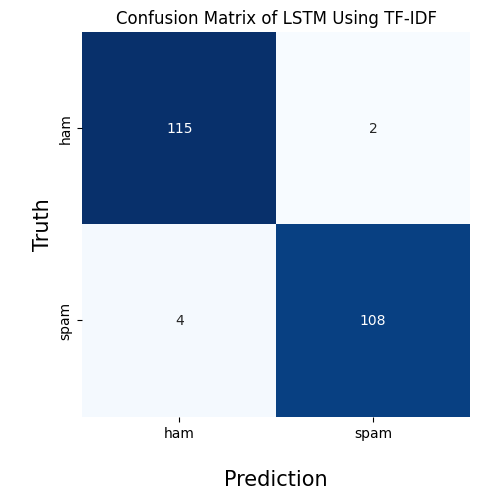

In [ ]:
cm_tfidf = confusion_matrix(y_test, result_tfidf)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of LSTM Using TF-IDF")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 115 data sebagai ham, memprediksi benar 108 data sebagai spam, keliru memprediksi 4 data spam sebagai ham, dan keliru memprediksi 2 data ham sebagai spam.

Secara keseluruhan, akurasi dapat diartikan bahwa dari semua data yang diprediksi, 97% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang baik dalam mengklasifikasikan data dengan benar secara keseluruhan, baik itu untuk kategori ham maupun spam.

In [ ]:
def predict_spam(sample_text, threshold=0.5):
    # Vectorize the sample text using TF-IDF vectorizer
    sample_seq = tfidf_vectorizer.transform([sample_text])
    padded = pad_sequences(sample_seq.toarray(), maxlen=sample_seq.shape[1])

    # Reshape the input to match the expected shape (None, 1, num_features)
    padded = padded.reshape(padded.shape[0], 1, padded.shape[1])

    # Predict using the loaded TF-IDF + GRU model
    prediction = model_tfidf_gru.predict(padded)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction >= threshold:  # Use >= to include cases where prediction == threshold
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "Resep Makanan Khas Padang : Rendang Daging Anti Alot"
predict_spam(predict_msg)

1/1 [==============================] - 0s 37ms/step


'Ham'

## Doc2Vec

In [ ]:
# Infer document vectors for training sentences
x_train_doc2vec = [d2v_model.infer_vector(word_tokenize(sentence.lower())) for sentence in x_train_sentences]

# Infer document vectors for testing sentences
x_test_doc2vec = [d2v_model.infer_vector(word_tokenize(sentence.lower())) for sentence in x_test_sentences]

# Convert to numpy arrays
x_train_doc2vec = np.array(x_train_doc2vec)
x_test_doc2vec = np.array(x_test_doc2vec)

# Calculate the number of samples and dimensions
num_train_samples, doc2vec_dim = x_train_doc2vec.shape
num_test_samples, _ = x_test_doc2vec.shape

### Architecture Modeling

In [ ]:
# Define the model
model_doc2vec_lstm = Sequential()
model_doc2vec_lstm.add(LSTM(128, input_shape=(None, doc2vec_dim), return_sequences=True))
model_doc2vec_lstm.add(Dropout(0.5))
model_doc2vec_lstm.add(LSTM(64, return_sequences=True))
model_doc2vec_lstm.add(Dropout(0.5))
model_doc2vec_lstm.add(LSTM(32))
model_doc2vec_lstm.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_doc2vec_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model_doc2vec_lstm.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, None, 128)         117248    
                                                                 
 dropout_27 (Dropout)        (None, None, 128)         0         
                                                                 
 lstm_50 (LSTM)              (None, None, 64)          49408     
                                                                 
 dropout_28 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_51 (LSTM)              (None, 32)                12416     
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 179105 (699.63 KB)
Trainable params: 17

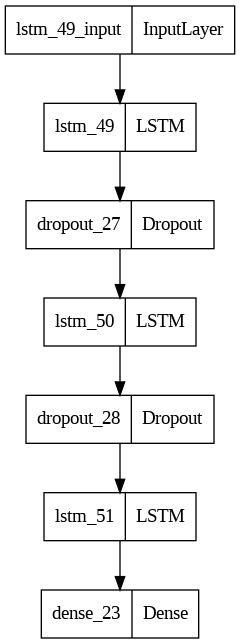

In [ ]:
from keras.utils import plot_model
plot_model(model_doc2vec_lstm, to_file='model_lstm_doc2vec.png')

Model ini memiliki tiga lapisan LSTM dengan masing-masing 128, 64, dan 32 unit. Setiap lapisan LSTM diikuti oleh lapisan dropout untuk meningkatkan generalization. Lapisan terakhir adalah lapisan dense dengan aktivasi sigmoid untuk menghasilkan prediksi, apakah termasuk ke dalam kategori Spam atau Ham.


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_doc2vec_lstm = model_doc2vec_lstm.fit(x_train_doc2vec[:, np.newaxis, :], y_train, epochs=10,
                                               validation_data=(x_test_doc2vec[:, np.newaxis, :], y_test),
                                               callbacks=[early_stop], verbose=2)

Epoch 1/10
29/29 - 1s - loss: 0.6930 - accuracy: 0.5055 - val_loss: 0.6934 - val_accuracy: 0.4891 - 507ms/epoch - 17ms/step
Epoch 2/10
29/29 - 0s - loss: 0.6928 - accuracy: 0.5055 - val_loss: 0.6934 - val_accuracy: 0.4891 - 423ms/epoch - 15ms/step
Epoch 3/10
29/29 - 0s - loss: 0.6923 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.4847 - 462ms/epoch - 16ms/step
Epoch 4/10
29/29 - 0s - loss: 0.6905 - accuracy: 0.5306 - val_loss: 0.6924 - val_accuracy: 0.5284 - 419ms/epoch - 14ms/step
Epoch 5/10
29/29 - 0s - loss: 0.6831 - accuracy: 0.6280 - val_loss: 0.6918 - val_accuracy: 0.5153 - 444ms/epoch - 15ms/step
Epoch 6/10
29/29 - 0s - loss: 0.6636 - accuracy: 0.6477 - val_loss: 0.6936 - val_accuracy: 0.5415 - 395ms/epoch - 14ms/step
Epoch 7/10
29/29 - 0s - loss: 0.6359 - accuracy: 0.6674 - val_loss: 0.6914 - val_accuracy: 0.5633 - 388ms/epoch - 13ms/step
Epoch 8/10
29/29 - 0s - loss: 0.6330 - accuracy: 0.6357 - val_loss: 0.6836 - val_accuracy: 0.5459 - 362ms/epoch - 12ms/step
Epoch 9/

### Model Evaluation

In [ ]:
# Evaluate the Doc2Vec LSTM model
loss_lstm_doc2vec, accuracy_lstm_doc2vec = model_doc2vec_lstm.evaluate(x_test_doc2vec[:, np.newaxis, :], y_test)  # Reshape x_test_doc2vec
print(f'Test Loss: {loss_lstm_doc2vec}')
print(f'Test Accuracy: {accuracy_lstm_doc2vec}')

8/8 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.6026
Test Loss: 0.674878716468811
Test Accuracy: 0.6026200652122498


In [ ]:
# Extract accuracy and loss values
train_acc_doc2vec = history_doc2vec_lstm.history['accuracy']
train_loss_doc2vec = history_doc2vec_lstm.history['loss']
val_loss_doc2vec = history_doc2vec_lstm.history['val_loss']
val_acc_doc2vec = history_doc2vec_lstm.history['val_accuracy']
epoch_doc2vec = [i + 1 for i in range(len(train_acc_doc2vec))]

# Create DataFrame for accuracy and loss
acc_loss_df_doc2vec = pd.DataFrame({"Training Loss": train_loss_doc2vec,
                                    "Validation Loss": val_loss_doc2vec,
                                    "Train Accuracy": train_acc_doc2vec,
                                    "Validation Accuracy": val_acc_doc2vec,
                                    "Epoch": epoch_doc2vec})
acc_loss_df_doc2vec.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.693016,0.693379,0.505470,0.489083,1
1,0.692811,0.693423,0.505470,0.489083,2
2,0.692283,0.693214,0.505470,0.484716,3
3,0.690480,0.692413,0.530635,0.528384,4
4,0.683148,0.691753,0.628009,0.515284,5
5,0.663642,0.693604,0.647702,0.541485,6
6,0.635865,0.691433,0.667396,0.563319,7
7,0.633011,0.683621,0.635667,0.545852,8
8,0.624648,0.675071,0.658643,0.576419,9
9,0.615077,0.674879,0.669584,0.602620,10


In [ ]:
# Plot training vs validation accuracy
fig_doc2vec = go.Figure()

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Train Accuracy'],
                                 mode='lines+markers',
                                 name='Training Accuracy'))

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Validation Accuracy'],
                                 mode='lines+markers',
                                 name='Validation Accuracy'))

fig_doc2vec.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (Doc2Vec)</b>\n",
                                 'xanchor': 'center',
                                 'yanchor': 'top',
                                 'y': 0.9, 'x': 0.5,},
                          xaxis_title="Epoch",
                          yaxis_title="Accuracy",
                          title_font=dict(size=20),
                          yaxis=dict(range=[0, 1.0]))

fig_doc2vec.layout.template = 'plotly_dark'
fig_doc2vec.show()

Model LSTM dengan metode text representation Doc2Vec menghasilkan akurasi sebesar 60.26% dan loss sebesar 0.67 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan peningkatan yang agak lambat, mengindikasikan bahwa model belajar dari data. Plot validation accuracy dan training accuracy menunjukkan adanya underfitting akibat kurangnya epoch karena terlihat masih ada peningkatan akurasi di akhir epoch. Proses training berhenti di epoch terakhir sehingga early stopping tidak menghentikan training di tengah proses.

In [ ]:
# Classification report and confusion matrix for Doc2Vec model
threshold = 0.5

# Reshape x_test_doc2vec to include sequence length dimension
result_doc2vec = model_doc2vec_lstm.predict(x_test_doc2vec[:, np.newaxis, :], verbose=2)
result_doc2vec = (result_doc2vec > threshold).astype("int32")

8/8 - 1s - 1s/epoch - 177ms/step


In [ ]:
print(classification_report(y_test, result_doc2vec, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.58      0.82      0.68       117
        spam       0.67      0.38      0.48       112

    accuracy                           0.60       229
   macro avg       0.62      0.60      0.58       229
weighted avg       0.62      0.60      0.58       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 58% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 82% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 68%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam, 67% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 38% di antaranya berhasil diprediksi dengan benar sebagai spam. Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 48%.


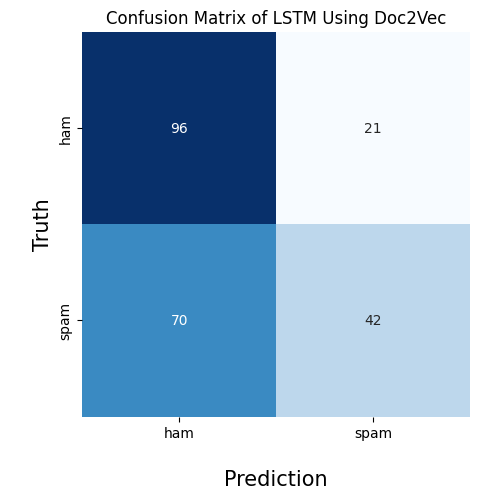

In [ ]:
cm_doc2vec = confusion_matrix(y_test, result_doc2vec)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_doc2vec, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of LSTM Using Doc2Vec")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 96 data sebagai ham, memprediksi benar 42 data sebagai spam, keliru memprediksi 70 data spam sebagai ham, dan keliru memprediksi 21 data ham sebagai spam.

Secara keseluruhan, accuracy dapat diartikan bahwa dari semua data yang diprediksi, 60% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang kurang baik dalam mengklasifikasikan data dengan benar secara keseluruhan.

In [ ]:
def predict_spam_doc2vec(sample_text, threshold=0.5):
    # Infer document vector for the sample text
    sample_vector = d2v_model.infer_vector(word_tokenize(sample_text.lower()))

    # Reshape the input to match the expected shape (None, 1, doc2vec_dim)
    sample_vector = sample_vector.reshape(1, 1, -1)

    # Predict using the Doc2Vec + LSTM model
    prediction = model_doc2vec_lstm.predict(sample_vector)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction > threshold:
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "hayok menangkan hadiah puluhan juta rupiah dengan klik link di bawah ini"
print(predict_spam_doc2vec(predict_msg))

1/1 [==============================] - 0s 110ms/step
Ham


# Bi-LSTM

## TF-IDF

### Architecture Modeling

In [ ]:
from keras.layers import Bidirectional

In [ ]:
# Bi-LSTM for TF-IDF
model_tfidf_bilstm = Sequential()
model_tfidf_bilstm.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train_tfidf_reshaped.shape[1], x_train_tfidf_reshaped.shape[2])))
model_tfidf_bilstm.add(Dropout(0.5))
model_tfidf_bilstm.add(Bidirectional(LSTM(64)))
model_tfidf_bilstm.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_tfidf_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_tfidf_bilstm.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1, 256)            858112    
 al)                                                             
                                                                 
 dropout_29 (Dropout)        (None, 1, 256)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1022593 (3.90 MB)
Trainable params: 1022593 (3.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


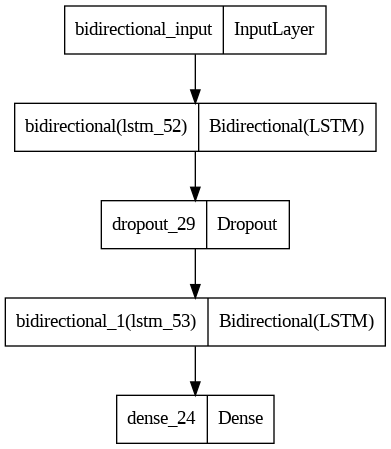

In [ ]:
from keras.utils import plot_model
plot_model(model_tfidf_bilstm, to_file='model_bilstm_tfidf.png')

Model Bi-LSTM dengan TF-IDF menggunakan dua lapisan LSTM bidirectional dengan masing-masing 128 dan 64 unit. Bidirectional wrapper memungkinkan network untuk menangkap dependencies secara dua arah (forward and backward directions). Setiap lapisan Bi-LSTM diikuti oleh lapisan dropout, dan lapisan output terakhir adalah lapisan dense dengan aktivasi sigmoid untuk melakukan binary classification, apakah nanti akan masuk ke dalam kategori Spam atau Ham.


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_tfidf_bilstm = model_tfidf_bilstm.fit(x_train_tfidf_reshaped, y_train, epochs=10,
                                               validation_data=(x_test_tfidf_reshaped, y_test),
                                               callbacks=[early_stop], verbose=2)

Epoch 1/10
29/29 - 15s - loss: 0.6778 - accuracy: 0.7243 - val_loss: 0.6370 - val_accuracy: 0.9039 - 15s/epoch - 510ms/step
Epoch 2/10
29/29 - 1s - loss: 0.5126 - accuracy: 0.9420 - val_loss: 0.3410 - val_accuracy: 0.9694 - 573ms/epoch - 20ms/step
Epoch 3/10
29/29 - 1s - loss: 0.2098 - accuracy: 0.9650 - val_loss: 0.1430 - val_accuracy: 0.9738 - 855ms/epoch - 29ms/step
Epoch 4/10
29/29 - 1s - loss: 0.0882 - accuracy: 0.9781 - val_loss: 0.1088 - val_accuracy: 0.9782 - 922ms/epoch - 32ms/step
Epoch 5/10
29/29 - 1s - loss: 0.0513 - accuracy: 0.9836 - val_loss: 0.1067 - val_accuracy: 0.9782 - 933ms/epoch - 32ms/step
Epoch 6/10
29/29 - 1s - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.1102 - val_accuracy: 0.9782 - 860ms/epoch - 30ms/step
Epoch 7/10
29/29 - 1s - loss: 0.0242 - accuracy: 0.9945 - val_loss: 0.1145 - val_accuracy: 0.9738 - 901ms/epoch - 31ms/step
Epoch 8/10
29/29 - 1s - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.1208 - val_accuracy: 0.9738 - 854ms/epoch - 29ms/step


### Model Evaluation

In [ ]:
# Evaluate the model
loss_bilstm_tfidf, accuracy_bilstm_tfidf = model_tfidf_bilstm.evaluate(x_test_tfidf_reshaped, y_test)
print(f'Test Loss: {loss_bilstm_tfidf}')
print(f'Test Accuracy: {accuracy_bilstm_tfidf}')

8/8 [==============================] - 0s 9ms/step - loss: 0.1208 - accuracy: 0.9738
Test Loss: 0.12078883498907089
Test Accuracy: 0.9737991094589233


In [ ]:
# Extract accuracy and loss values
train_acc_tfidf = history_tfidf_bilstm.history['accuracy']
train_loss_tfidf = history_tfidf_bilstm.history['loss']
val_loss_tfidf = history_tfidf_bilstm.history['val_loss']
val_acc_tfidf = history_tfidf_bilstm.history['val_accuracy']
epoch_tfidf = [i + 1 for i in range(len(train_acc_tfidf))]

# Create DataFrame for accuracy and loss
acc_loss_df_tfidf = pd.DataFrame({"Training Loss": train_loss_tfidf,
                                  "Validation Loss": val_loss_tfidf,
                                  "Train Accuracy": train_acc_tfidf,
                                  "Validation Accuracy": val_acc_tfidf,
                                  "Epoch": epoch_tfidf})
acc_loss_df_tfidf.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.677807,0.636960,0.724289,0.903930,1
1,0.512571,0.341014,0.942013,0.969432,2
2,0.209840,0.142977,0.964989,0.973799,3
3,0.088235,0.108802,0.978118,0.978166,4
4,0.051340,0.106739,0.983589,0.978166,5
5,0.034929,0.110245,0.989059,0.978166,6
6,0.024195,0.114542,0.994530,0.973799,7
7,0.017027,0.120789,0.995624,0.973799,8


In [ ]:
# Plot training vs validation accuracy
fig_tfidf = go.Figure()

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Train Accuracy'],
                               mode='lines+markers',
                               name='Training Accuracy'))

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Validation Accuracy'],
                               mode='lines+markers',
                               name='Validation Accuracy'))

fig_tfidf.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (TF-IDF)</b>\n",
                               'xanchor': 'center',
                               'yanchor': 'top',
                               'y': 0.9, 'x': 0.5,},
                        xaxis_title="Epoch",
                        yaxis_title="Accuracy",
                        title_font=dict(size=20))

fig_tfidf.layout.template = 'plotly_dark'
fig_tfidf.show()

Model Bi-LSTM dengan metode text representation TF-IDF menghasilkan akurasi optimal sebesar 97.34% dan loss sebesar 0.12 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan peningkatan yang signifikan pada beberapa epoch pertama, menunjukkan bahwa model belajar dengan cepat dari data. Plot validation accuracy dan training accuracy menunjukkan bahwa model merupakan good fit karena akurasi validasi tetap meningkat dan sejajar dengan akurasi pelatihan. Kedua kurva berada sangat dekat satu sama lain, menunjukkan bahwa model generalisasi dengan baik ke data yang tidak terlihat (validasi). Proses training berhenti di epoch ke delapan karena early stopping menghentikan training di tengah proses. Model dengan weight terbaik diperoleh pada epoch ke empat.

In [ ]:
# Classification report and confusion matrix for TF-IDF model
threshold = 0.5
result_tfidf = model_tfidf_bilstm.predict(x_test_tfidf_reshaped, verbose=2)
result_tfidf = (result_tfidf > threshold).astype("int32")

8/8 - 2s - 2s/epoch - 247ms/step


In [ ]:
print(classification_report(y_test, result_tfidf, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.97       117
        spam       0.98      0.96      0.97       112

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 97% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 98% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 97%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam, 98% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 96% di antaranya berhasil diprediksi dengan benar sebagai spam. Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 97%.


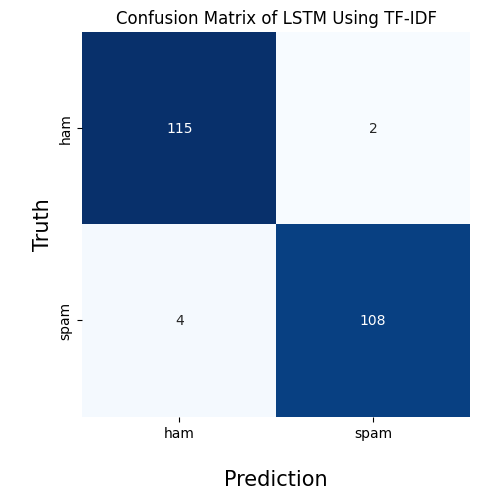

In [ ]:
cm_tfidf = confusion_matrix(y_test, result_tfidf)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of LSTM Using TF-IDF")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 115 data sebagai ham, memprediksi benar 108 data sebagai spam, keliru memprediksi 4 data spam sebagai ham, dan keliru memprediksi 2 data ham sebagai spam.

Secara keseluruhan, accuracy dapat diartikan bahwa dari semua data yang diprediksi, 97% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang baik dalam mengklasifikasikan data dengan benar secara keseluruhan, baik itu untuk kategori ham maupun spam.

In [ ]:
def predict_spam(sample_text, threshold=0.5):
    # Vectorize the sample text using TF-IDF vectorizer
    sample_seq = tfidf_vectorizer.transform([sample_text])
    padded = pad_sequences(sample_seq.toarray(), maxlen=sample_seq.shape[1])

    # Reshape the input to match the expected shape (None, 1, num_features)
    padded = padded.reshape(padded.shape[0], 1, padded.shape[1])

    # Predict using the loaded TF-IDF + GRU model
    prediction = model_tfidf_bilstm.predict(padded)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction > threshold:
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "hayok menangkan hadiah puluhan juta rupiah dengan klik link di bawah ini"
predict_spam(predict_msg)

1/1 [==============================] - 0s 44ms/step


'Spam'

## Doc2Vec

### Architecture Modeling

In [ ]:
# Define the model
model_doc2vec_bilstm = Sequential()
model_doc2vec_bilstm.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(None, doc2vec_dim)))
model_doc2vec_bilstm.add(Dropout(0.5))
model_doc2vec_bilstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_doc2vec_bilstm.add(Dropout(0.5))
model_doc2vec_bilstm.add(Bidirectional(LSTM(32)))
model_doc2vec_bilstm.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_doc2vec_bilstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model_doc2vec_bilstm.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, None, 256)         234496    
 onal)                                                           
                                                                 
 dropout_30 (Dropout)        (None, None, 256)         0         
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 128)         164352    
 onal)                                                           
                                                                 
 dropout_31 (Dropout)        (None, None, 128)         0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                     

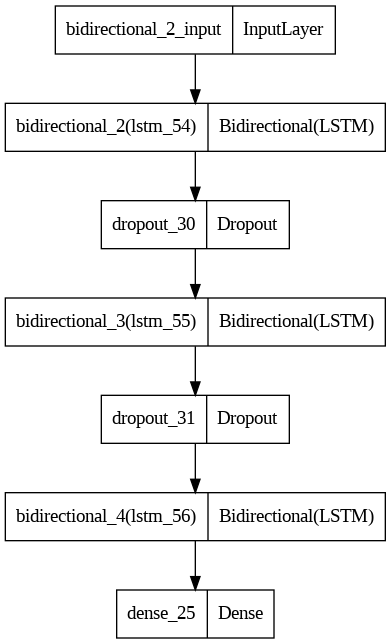

In [ ]:
from keras.utils import plot_model
plot_model(model_doc2vec_bilstm, to_file='model_bilstm_doc2vec.png')

Model ini memiliki tiga lapisan Bi-LSTM dengan masing-masing 128, 64, dan 32 unit, yang diikuti oleh lapisan dropout untuk mencegah overfitting. Lapisan terakhir adalah lapisan dense dengan aktivasi sigmoid untuk klasifikasi, apakah termasuk ke dalam kategori Spam atau Ham.

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_doc2vec_bilstm = model_doc2vec_bilstm.fit(x_train_doc2vec[:, np.newaxis, :], y_train, epochs=10,
                                               validation_data=(x_test_doc2vec[:, np.newaxis, :], y_test),
                                               callbacks=[early_stop], verbose=2)

Epoch 1/10
29/29 - 1s - loss: 0.6910 - accuracy: 0.5055 - val_loss: 0.6925 - val_accuracy: 0.5197 - 846ms/epoch - 29ms/step
Epoch 2/10
29/29 - 1s - loss: 0.6831 - accuracy: 0.5963 - val_loss: 0.6904 - val_accuracy: 0.5240 - 650ms/epoch - 22ms/step
Epoch 3/10
29/29 - 1s - loss: 0.6550 - accuracy: 0.6411 - val_loss: 0.6965 - val_accuracy: 0.5502 - 803ms/epoch - 28ms/step
Epoch 4/10
29/29 - 1s - loss: 0.6315 - accuracy: 0.6521 - val_loss: 0.6836 - val_accuracy: 0.5764 - 750ms/epoch - 26ms/step
Epoch 5/10
29/29 - 1s - loss: 0.6187 - accuracy: 0.6565 - val_loss: 0.6934 - val_accuracy: 0.5633 - 1s/epoch - 36ms/step
Epoch 6/10
29/29 - 1s - loss: 0.6108 - accuracy: 0.6554 - val_loss: 0.6614 - val_accuracy: 0.6332 - 987ms/epoch - 34ms/step
Epoch 7/10
29/29 - 1s - loss: 0.6024 - accuracy: 0.6685 - val_loss: 0.6512 - val_accuracy: 0.6201 - 1s/epoch - 36ms/step
Epoch 8/10
29/29 - 1s - loss: 0.5939 - accuracy: 0.7002 - val_loss: 0.6622 - val_accuracy: 0.6288 - 1s/epoch - 38ms/step
Epoch 9/10
29/29 

### Model Evaluation

In [ ]:
# Evaluate the Doc2Vec LSTM model
loss_bilstm_doc2vec, accuracy_bilstm_doc2vec = model_doc2vec_bilstm.evaluate(x_test_doc2vec[:, np.newaxis, :], y_test)  # Reshape x_test_doc2vec
print(f'Test Loss: {loss_bilstm_doc2vec}')
print(f'Test Accuracy: {accuracy_bilstm_doc2vec}')

8/8 [==============================] - 0s 9ms/step - loss: 0.6549 - accuracy: 0.6245
Test Loss: 0.6548940539360046
Test Accuracy: 0.624454140663147


In [ ]:
# Extract accuracy and loss values
train_acc_doc2vec = history_doc2vec_bilstm.history['accuracy']
train_loss_doc2vec = history_doc2vec_bilstm.history['loss']
val_loss_doc2vec = history_doc2vec_bilstm.history['val_loss']
val_acc_doc2vec = history_doc2vec_bilstm.history['val_accuracy']
epoch_doc2vec = [i + 1 for i in range(len(train_acc_doc2vec))]

# Create DataFrame for accuracy and loss
acc_loss_df_doc2vec = pd.DataFrame({"Training Loss": train_loss_doc2vec,
                                    "Validation Loss": val_loss_doc2vec,
                                    "Train Accuracy": train_acc_doc2vec,
                                    "Validation Accuracy": val_acc_doc2vec,
                                    "Epoch": epoch_doc2vec})
acc_loss_df_doc2vec.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.691033,0.692468,0.505470,0.519651,1
1,0.683100,0.690444,0.596280,0.524017,2
2,0.654951,0.696452,0.641138,0.550218,3
3,0.631496,0.683634,0.652079,0.576419,4
4,0.618696,0.693404,0.656455,0.563319,5
5,0.610769,0.661416,0.655361,0.633188,6
6,0.602378,0.651153,0.668490,0.620087,7
7,0.593921,0.662237,0.700219,0.628821,8
8,0.581395,0.654894,0.683807,0.624454,9


In [ ]:
# Plot training vs validation accuracy
fig_doc2vec = go.Figure()

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Train Accuracy'],
                                 mode='lines+markers',
                                 name='Training Accuracy'))

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Validation Accuracy'],
                                 mode='lines+markers',
                                 name='Validation Accuracy'))

fig_doc2vec.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (Doc2Vec)</b>\n",
                                 'xanchor': 'center',
                                 'yanchor': 'top',
                                 'y': 0.9, 'x': 0.5,},
                          xaxis_title="Epoch",
                          yaxis_title="Accuracy",
                          title_font=dict(size=20),
                          yaxis=dict(range=[0, 1.0]))

fig_doc2vec.layout.template = 'plotly_dark'
fig_doc2vec.show()

Model Bi-LSTM dengan metode text representation Doc2Vec menghasilkan akurasi sebesar 62.45% dan loss sebesar 0.65 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan peningkatan yang agak lambat, mengindikasikan bahwa model belajar dari data. Plot validation accuracy dan training accuracy menunjukkan adanya underfitting akibat arsitektur model yang terlalu sederhana karena terlihat akurasi tidak bertambah di akhir epoch. Proses training berhenti di epoch ke sembilan karena early stopping menghentikan training di tengah proses.

In [ ]:
# Classification report and confusion matrix for Doc2Vec model
threshold = 0.5

# Reshape x_test_doc2vec to include sequence length dimension
result_doc2vec = model_doc2vec_bilstm.predict(x_test_doc2vec[:, np.newaxis, :], verbose=2)
result_doc2vec = (result_doc2vec > threshold).astype("int32")

8/8 - 5s - 5s/epoch - 687ms/step


In [ ]:
print(classification_report(y_test, result_doc2vec, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.62      0.68      0.65       117
        spam       0.63      0.56      0.59       112

    accuracy                           0.62       229
   macro avg       0.63      0.62      0.62       229
weighted avg       0.62      0.62      0.62       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 62% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 68% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 65%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam 63% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 56% di antaranya berhasil diprediksi dengan benar sebagai spam. Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 59%.


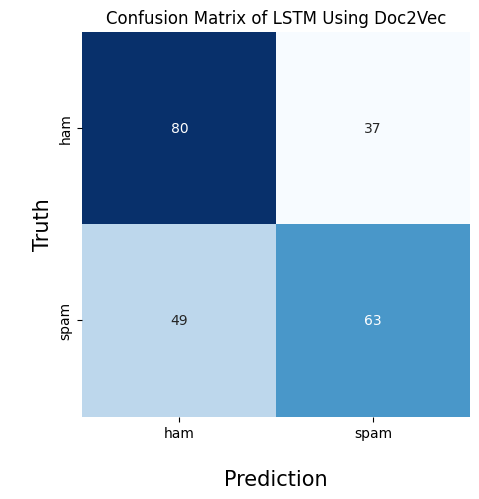

In [ ]:
cm_doc2vec = confusion_matrix(y_test, result_doc2vec)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_doc2vec, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of LSTM Using Doc2Vec")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 80 data sebagai ham, memprediksi benar 63 data sebagai spam, keliru memprediksi 49 data spam sebagai ham, dan keliru memprediksi 37 data ham sebagai spam.

Secara keseluruhan, accuracy dapat diartikan bahwa dari semua data yang diprediksi, 62% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang kurang baik dalam mengklasifikasikan data dengan benar secara keseluruhan.


In [ ]:
def predict_spam_doc2vec(sample_text, threshold=0.5):
    # Infer document vector for the sample text
    sample_vector = d2v_model.infer_vector(word_tokenize(sample_text.lower()))

    # Reshape the input to match the expected shape (None, 1, doc2vec_dim)
    sample_vector = sample_vector.reshape(1, 1, -1)

    # Predict using the Doc2Vec + LSTM model
    prediction = model_doc2vec_bilstm.predict(sample_vector)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction > threshold:
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "anda yg terpilih mendptkan mob1l1io sen1la1 100 juta"
print(predict_spam_doc2vec(predict_msg))

1/1 [==============================] - 0s 66ms/step
Spam


# GRU

## TF-IDF

### Architecture Modeling

In [ ]:
from keras.layers import GRU

In [ ]:
# GRU for TF-IDF
model_tfidf_gru = Sequential()
model_tfidf_gru.add(GRU(128, input_shape=(x_train_tfidf_reshaped.shape[1], x_train_tfidf_reshaped.shape[2]), return_sequences=True))
model_tfidf_gru.add(Dropout(0.5))
model_tfidf_gru.add(GRU(64))
model_tfidf_gru.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_tfidf_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_tfidf_gru.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 128)            322176    
                                                                 
 dropout_32 (Dropout)        (None, 1, 128)            0         
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 359489 (1.37 MB)
Trainable params: 359489 (1.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


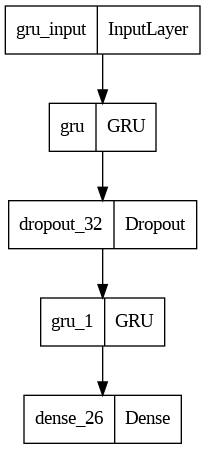

In [ ]:
from keras.utils import plot_model
plot_model(model_tfidf_gru, to_file='model_gru_tfidf.png')

Model GRU untuk fitur TF-IDF memiliki dua lapisan GRU dengan masing-masing 128 dan 64 unit. Lapisan GRU pertama diikuti oleh lapisan dropout untuk mengurangi overfitting, dan lapisan terakhir adalah lapisan dense dengan aktivasi sigmoid untuk memprediksi output, apakah nanti akan masuk ke dalam kategori Spam atau Ham.

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_tfidf_gru = model_tfidf_gru.fit(x_train_tfidf_reshaped, y_train, epochs=10,
                                         validation_data=(x_test_tfidf_reshaped, y_test),
                                         callbacks=[early_stop], verbose=2)

Epoch 1/10
29/29 - 8s - loss: 0.6702 - accuracy: 0.7746 - val_loss: 0.6168 - val_accuracy: 0.9651 - 8s/epoch - 277ms/step
Epoch 2/10
29/29 - 0s - loss: 0.4912 - accuracy: 0.9486 - val_loss: 0.3188 - val_accuracy: 0.9694 - 452ms/epoch - 16ms/step
Epoch 3/10
29/29 - 0s - loss: 0.1987 - accuracy: 0.9661 - val_loss: 0.1333 - val_accuracy: 0.9782 - 485ms/epoch - 17ms/step
Epoch 4/10
29/29 - 0s - loss: 0.0886 - accuracy: 0.9781 - val_loss: 0.1079 - val_accuracy: 0.9782 - 467ms/epoch - 16ms/step
Epoch 5/10
29/29 - 0s - loss: 0.0562 - accuracy: 0.9836 - val_loss: 0.1039 - val_accuracy: 0.9782 - 490ms/epoch - 17ms/step
Epoch 6/10
29/29 - 0s - loss: 0.0383 - accuracy: 0.9891 - val_loss: 0.1050 - val_accuracy: 0.9782 - 499ms/epoch - 17ms/step
Epoch 7/10
29/29 - 0s - loss: 0.0276 - accuracy: 0.9934 - val_loss: 0.1069 - val_accuracy: 0.9782 - 474ms/epoch - 16ms/step
Epoch 8/10
29/29 - 0s - loss: 0.0182 - accuracy: 0.9978 - val_loss: 0.1112 - val_accuracy: 0.9782 - 326ms/epoch - 11ms/step


### Model Evaluation

In [ ]:
# Evaluate the model
loss_gru_tfidf, accuracy_gru_tfidf = model_tfidf_gru.evaluate(x_test_tfidf_reshaped, y_test)
print(f'Test Loss: {loss_gru_tfidf}')
print(f'Test Accuracy: {accuracy_gru_tfidf}')

8/8 [==============================] - 0s 11ms/step - loss: 0.1112 - accuracy: 0.9782
Test Loss: 0.11120245605707169
Test Accuracy: 0.9781659245491028


In [ ]:
# Extract accuracy and loss values
train_acc_tfidf = history_tfidf_gru.history['accuracy']
train_loss_tfidf = history_tfidf_gru.history['loss']
val_loss_tfidf = history_tfidf_gru.history['val_loss']
val_acc_tfidf = history_tfidf_gru.history['val_accuracy']
epoch_tfidf = [i + 1 for i in range(len(train_acc_tfidf))]

# Create DataFrame for accuracy and loss
acc_loss_df_tfidf = pd.DataFrame({"Training Loss": train_loss_tfidf,
                                  "Validation Loss": val_loss_tfidf,
                                  "Train Accuracy": train_acc_tfidf,
                                  "Validation Accuracy": val_acc_tfidf,
                                  "Epoch": epoch_tfidf})
acc_loss_df_tfidf.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.670208,0.616822,0.774617,0.965065,1
1,0.491187,0.318813,0.948578,0.969432,2
2,0.198698,0.133330,0.966083,0.978166,3
3,0.088612,0.107869,0.978118,0.978166,4
4,0.056209,0.103911,0.983589,0.978166,5
5,0.038292,0.105015,0.989059,0.978166,6
6,0.027588,0.106946,0.993435,0.978166,7
7,0.018197,0.111202,0.997812,0.978166,8


In [ ]:
# Plot training vs validation accuracy
fig_tfidf = go.Figure()

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Train Accuracy'],
                               mode='lines+markers',
                               name='Training Accuracy'))

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Validation Accuracy'],
                               mode='lines+markers',
                               name='Validation Accuracy'))

fig_tfidf.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (TF-IDF)</b>\n",
                               'xanchor': 'center',
                               'yanchor': 'top',
                               'y': 0.9, 'x': 0.5,},
                        xaxis_title="Epoch",
                        yaxis_title="Accuracy",
                        title_font=dict(size=20))

fig_tfidf.layout.template = 'plotly_dark'
fig_tfidf.show()

Model GRU dengan metode text representation TF-IDF menghasilkan akurasi sebesar 97.82% dan loss sebesar 0.11 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan peningkatan yang signifikan pada beberapa epoch pertama, mengindikasikan bahwa model belajar dengan cepat dari data. Plot validation accuracy dan training accuracy menunjukkan bahwa model merupakan good fit karena akurasi validasi tetap meningkat dan sejajar dengan akurasi pelatihan. Kedua kurva berada sangat dekat satu sama lain, menunjukkan bahwa model generalisasi dengan baik ke data yang tidak terlihat (validasi). Proses training berhenti di epoch terakhir sehingga early stopping tidak menghentikan training di tengah proses. Model dengan weight terbaik diperoleh pada epoch ke empat.


In [ ]:
# Classification report and confusion matrix for TF-IDF model
threshold = 0.5
result_tfidf = model_tfidf_gru.predict(x_test_tfidf_reshaped, verbose=2)
result_tfidf = (result_tfidf > threshold).astype("int32")

8/8 - 1s - 1s/epoch - 153ms/step


In [ ]:
print(classification_report(y_test, result_tfidf, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       117
        spam       0.98      0.97      0.98       112

    accuracy                           0.98       229
   macro avg       0.98      0.98      0.98       229
weighted avg       0.98      0.98      0.98       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 97% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 98% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 98%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam, 98% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 97% di antaranya berhasil diprediksi dengan benar sebagai spam. Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 98%.

Secara keseluruhan, accuracy dapat diartikan bahwa dari semua data yang diprediksi, 98% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang baik dalam mengklasifikasikan data dengan benar secara keseluruhan, baik itu untuk kategori ham maupun spam.


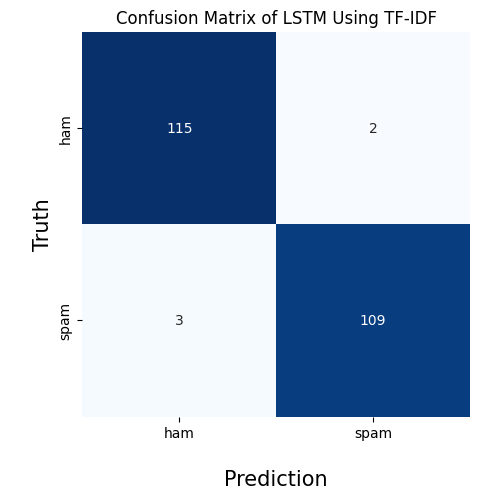

In [ ]:
cm_tfidf = confusion_matrix(y_test, result_tfidf)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of LSTM Using TF-IDF")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 115 data sebagai ham, memprediksi benar 109 data sebagai spam, keliru memprediksi 3 data spam sebagai ham, dan keliru memprediksi 2 data ham sebagai spam.


In [ ]:
def predict_spam(sample_text, threshold=0.5):
    # Vectorize the sample text using TF-IDF vectorizer
    sample_seq = tfidf_vectorizer.transform([sample_text])
    padded = pad_sequences(sample_seq.toarray(), maxlen=sample_seq.shape[1])

    # Reshape the input to match the expected shape (None, 1, num_features)
    padded = padded.reshape(padded.shape[0], 1, padded.shape[1])

    # Predict using the loaded TF-IDF + GRU model
    prediction = model_tfidf_gru.predict(padded)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction > threshold:
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "slmt bapak berhasil mndptkn hadiah sebesar 1 jt rupiah dr hasil undian, silakan hubungi no 081255648102"
predict_spam(predict_msg)

1/1 [==============================] - 0s 41ms/step


'Spam'

## Doc2Vec

### Architecture Modeling

In [ ]:
# GRU for Doc2Vec
model_doc2vec_gru = Sequential()
model_doc2vec_gru.add(GRU(128, input_shape=(None, doc2vec_dim), return_sequences=True))
model_doc2vec_gru.add(Dropout(0.5))
model_doc2vec_gru.add(GRU(64, return_sequences=True))
model_doc2vec_gru.add(Dropout(0.5))
model_doc2vec_gru.add(GRU(32))
model_doc2vec_gru.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_doc2vec_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model_doc2vec_gru.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, None, 128)         88320     
                                                                 
 dropout_33 (Dropout)        (None, None, 128)         0         
                                                                 
 gru_3 (GRU)                 (None, None, 64)          37248     
                                                                 
 dropout_34 (Dropout)        (None, None, 64)          0         
                                                                 
 gru_4 (GRU)                 (None, 32)                9408      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 135009 (527.38 KB)
Trainable params: 13

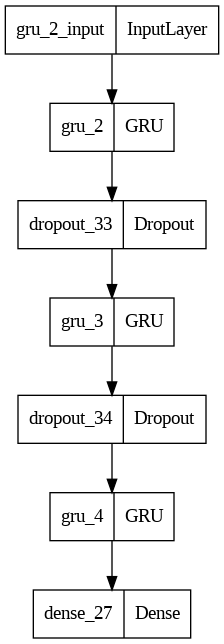

In [ ]:
from keras.utils import plot_model
plot_model(model_doc2vec_gru, to_file='model_gru_doc2vec.png')

Model ini terdiri dari tiga lapisan GRU dengan masing-masing 128, 64, dan 32 unit. Setiap lapisan GRU diikuti oleh lapisan dropout untuk mencegah overfitting. Lapisan terakhir adalah lapisan dense dengan fungsi aktivasi sigmoid untuk binary classification, apakah termasuk ke dalam kategori Spam atau Ham.

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_doc2vec_gru = model_doc2vec_gru.fit(x_train_doc2vec[:, np.newaxis, :], y_train, epochs=10,
                                               validation_data=(x_test_doc2vec[:, np.newaxis, :], y_test),
                                               callbacks=[early_stop], verbose=2)

Epoch 1/10
29/29 - 0s - loss: 0.6101 - accuracy: 0.6641 - val_loss: 0.6611 - val_accuracy: 0.6201 - 440ms/epoch - 15ms/step
Epoch 2/10
29/29 - 0s - loss: 0.6103 - accuracy: 0.6575 - val_loss: 0.6584 - val_accuracy: 0.6288 - 367ms/epoch - 13ms/step
Epoch 3/10
29/29 - 0s - loss: 0.6098 - accuracy: 0.6729 - val_loss: 0.6527 - val_accuracy: 0.6157 - 376ms/epoch - 13ms/step
Epoch 4/10
29/29 - 0s - loss: 0.5966 - accuracy: 0.6827 - val_loss: 0.6579 - val_accuracy: 0.6201 - 332ms/epoch - 11ms/step
Epoch 5/10
29/29 - 0s - loss: 0.5939 - accuracy: 0.6893 - val_loss: 0.6524 - val_accuracy: 0.6245 - 333ms/epoch - 11ms/step
Epoch 6/10
29/29 - 0s - loss: 0.5948 - accuracy: 0.6740 - val_loss: 0.6464 - val_accuracy: 0.6201 - 350ms/epoch - 12ms/step
Epoch 7/10
29/29 - 0s - loss: 0.5959 - accuracy: 0.6794 - val_loss: 0.6469 - val_accuracy: 0.6157 - 335ms/epoch - 12ms/step
Epoch 8/10
29/29 - 0s - loss: 0.5810 - accuracy: 0.6915 - val_loss: 0.6463 - val_accuracy: 0.6157 - 374ms/epoch - 13ms/step
Epoch 9/

### Model Evaluation

In [ ]:
# Evaluate the Doc2Vec LSTM model
loss_gru_doc2vec, accuracy_gru_doc2vec = model_doc2vec_gru.evaluate(x_test_doc2vec[:, np.newaxis, :], y_test)  # Reshape x_test_doc2vec
print(f'Test Loss: {loss_gru_doc2vec}')
print(f'Test Accuracy: {accuracy_gru_doc2vec}')

8/8 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6157
Test Loss: 0.6654813289642334
Test Accuracy: 0.6157205104827881


In [ ]:
# Extract accuracy and loss values
train_acc_doc2vec = history_doc2vec_gru.history['accuracy']
train_loss_doc2vec = history_doc2vec_gru.history['loss']
val_loss_doc2vec = history_doc2vec_gru.history['val_loss']
val_acc_doc2vec = history_doc2vec_gru.history['val_accuracy']
epoch_doc2vec = [i + 1 for i in range(len(train_acc_doc2vec))]

# Create DataFrame for accuracy and loss
acc_loss_df_doc2vec = pd.DataFrame({"Training Loss": train_loss_doc2vec,
                                    "Validation Loss": val_loss_doc2vec,
                                    "Train Accuracy": train_acc_doc2vec,
                                    "Validation Accuracy": val_acc_doc2vec,
                                    "Epoch": epoch_doc2vec})
acc_loss_df_doc2vec.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.610101,0.661085,0.664114,0.620087,1
1,0.610270,0.658352,0.657549,0.628821,2
2,0.609760,0.652665,0.672867,0.615721,3
3,0.596643,0.657893,0.682713,0.620087,4
4,0.593944,0.652380,0.689278,0.624454,5
5,0.594783,0.646448,0.673961,0.620087,6
6,0.595922,0.646865,0.679431,0.615721,7
7,0.581030,0.646338,0.691466,0.615721,8
8,0.596418,0.668882,0.687090,0.620087,9
9,0.587283,0.665481,0.689278,0.615721,10


In [ ]:
# Plot training vs validation accuracy
fig_doc2vec = go.Figure()

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Train Accuracy'],
                                 mode='lines+markers',
                                 name='Training Accuracy'))

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Validation Accuracy'],
                                 mode='lines+markers',
                                 name='Validation Accuracy'))

fig_doc2vec.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (Doc2Vec)</b>\n",
                                 'xanchor': 'center',
                                 'yanchor': 'top',
                                 'y': 0.9, 'x': 0.5,},
                          xaxis_title="Epoch",
                          yaxis_title="Accuracy",
                          title_font=dict(size=20),
                          yaxis=dict(range=[0, 1.0]))

fig_doc2vec.layout.template = 'plotly_dark'
fig_doc2vec.show()

Model GRU dengan metode text representation Doc2Vec menghasilkan akurasi sebesar 61.57% dan loss sebesar 0.67 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan tidak adanya peningkatan, mengindikasikan bahwa model tidak belajar dari data. Plot validation accuracy dan training accuracy menunjukkan adanya underfitting akibat arsitektur model yang terlalu sederhana karena terlihat akurasi tidak bertambah. Proses training berhenti di epoch terakhir sehingga early stopping tidak menghentikan training di tengah proses.

In [ ]:
# Classification report and confusion matrix for Doc2Vec model
threshold = 0.5

# Reshape x_test_doc2vec to include sequence length dimension
result_doc2vec = model_doc2vec_gru.predict(x_test_doc2vec[:, np.newaxis, :], verbose=2)
result_doc2vec = (result_doc2vec > threshold).astype("int32")

8/8 - 2s - 2s/epoch - 278ms/step


In [ ]:
print(classification_report(y_test, result_doc2vec, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.59      0.79      0.68       117
        spam       0.66      0.44      0.53       112

    accuracy                           0.62       229
   macro avg       0.63      0.61      0.60       229
weighted avg       0.63      0.62      0.60       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 59% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 79% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 68%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam, 66% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 44% di antaranya berhasil diprediksi dengan benar sebagai spam. Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 53%.

Dari nilai akurasi yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi, 62% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang kurang baik dalam mengklasifikasikan data dengan benar secara keseluruhan.


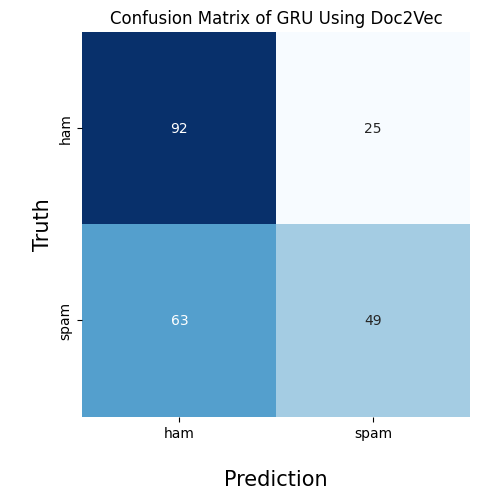

In [ ]:
cm_doc2vec = confusion_matrix(y_test, result_doc2vec)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_doc2vec, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of GRU Using Doc2Vec")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 92 data sebagai ham, memprediksi benar 49 data sebagai spam, keliru memprediksi 63 data spam sebagai ham, dan keliru memprediksi 25 data ham sebagai spam.

In [ ]:
def predict_spam_doc2vec(sample_text, threshold=0.5):
    # Infer document vector for the sample text
    sample_vector = d2v_model.infer_vector(word_tokenize(sample_text.lower()))

    # Reshape the input to match the expected shape (None, 1, doc2vec_dim)
    sample_vector = sample_vector.reshape(1, 1, -1)

    # Predict using the Doc2Vec + LSTM model
    prediction = model_doc2vec_gru.predict(sample_vector)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction > threshold:
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "Harga tiket pesawat murah tinggal cek di ticket.com"
print(predict_spam_doc2vec(predict_msg))

1/1 [==============================] - 0s 38ms/step
Ham


# Bi-GRU

## TF-IDF

### Architecture Modeling

In [ ]:
from keras.layers import Bidirectional

In [ ]:
# Bi-GRU for TF-IDF
model_tfidf_bigru = Sequential()
model_tfidf_bigru.add(Bidirectional(GRU(128, return_sequences=True), input_shape=(x_train_tfidf_reshaped.shape[1], x_train_tfidf_reshaped.shape[2])))
model_tfidf_bigru.add(Dropout(0.5))
model_tfidf_bigru.add(Bidirectional(GRU(64)))
model_tfidf_bigru.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_tfidf_bigru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_tfidf_bigru.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirecti  (None, 1, 256)            644352    
 onal)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 1, 256)            0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 128)               123648    
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 1)                 129       
                                                                 
Total params: 768129 (2.93 MB)
Trainable params: 768129 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


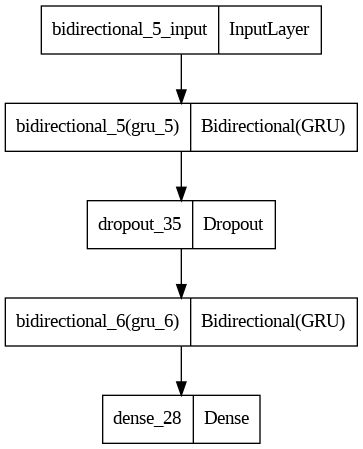

In [ ]:
from keras.utils import plot_model
plot_model(model_tfidf_bigru, to_file='model_bigru_tfidf.png')

model Bi-GRU terdiri dari dua lapisan GRU bidirectional dengan masing-masing 128 dan 64 unit. Lapisan GRU bidirectional membantu menangkap konteks secara dua arah (forward and backward directions). Setiap lapisan Bi-GRU diikuti oleh lapisan dropout, dan lapisan dense terakhir menggunakan fungsi aktivasi sigmoid untuk output, apakah nanti akan masuk ke dalam kategori Spam atau Ham.

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_tfidf_bigru = model_tfidf_bigru.fit(x_train_tfidf_reshaped, y_train, epochs=10,
                                               validation_data=(x_test_tfidf_reshaped, y_test),
                                               callbacks=[early_stop], verbose=2)

Epoch 1/10
29/29 - 12s - loss: 0.6386 - accuracy: 0.7440 - val_loss: 0.5002 - val_accuracy: 0.9607 - 12s/epoch - 401ms/step
Epoch 2/10
29/29 - 1s - loss: 0.2981 - accuracy: 0.9694 - val_loss: 0.1457 - val_accuracy: 0.9782 - 1s/epoch - 36ms/step
Epoch 3/10
29/29 - 0s - loss: 0.0862 - accuracy: 0.9803 - val_loss: 0.1111 - val_accuracy: 0.9738 - 448ms/epoch - 15ms/step
Epoch 4/10
29/29 - 0s - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.1081 - val_accuracy: 0.9738 - 444ms/epoch - 15ms/step
Epoch 5/10
29/29 - 0s - loss: 0.0287 - accuracy: 0.9934 - val_loss: 0.1108 - val_accuracy: 0.9738 - 441ms/epoch - 15ms/step
Epoch 6/10
29/29 - 0s - loss: 0.0185 - accuracy: 0.9978 - val_loss: 0.1169 - val_accuracy: 0.9694 - 473ms/epoch - 16ms/step
Epoch 7/10
29/29 - 0s - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.1237 - val_accuracy: 0.9738 - 449ms/epoch - 15ms/step


### Model Evaluation

In [ ]:
# Evaluate the model
loss_bigru_tfidf, accuracy_bigru_tfidf = model_tfidf_bigru.evaluate(x_test_tfidf_reshaped, y_test)
print(f'Test Loss: {loss_bigru_tfidf}')
print(f'Test Accuracy: {accuracy_bigru_tfidf}')

8/8 [==============================] - 0s 7ms/step - loss: 0.1237 - accuracy: 0.9738
Test Loss: 0.12372148036956787
Test Accuracy: 0.9737991094589233


In [ ]:
# Extract accuracy and loss values
train_acc_tfidf = history_tfidf_bigru.history['accuracy']
train_loss_tfidf = history_tfidf_bigru.history['loss']
val_loss_tfidf = history_tfidf_bigru.history['val_loss']
val_acc_tfidf = history_tfidf_bigru.history['val_accuracy']
epoch_tfidf = [i + 1 for i in range(len(train_acc_tfidf))]

# Create DataFrame for accuracy and loss
acc_loss_df_tfidf = pd.DataFrame({"Training Loss": train_loss_tfidf,
                                  "Validation Loss": val_loss_tfidf,
                                  "Train Accuracy": train_acc_tfidf,
                                  "Validation Accuracy": val_acc_tfidf,
                                  "Epoch": epoch_tfidf})
acc_loss_df_tfidf.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.638554,0.500234,0.743982,0.960699,1
1,0.298073,0.145736,0.969365,0.978166,2
2,0.086161,0.111080,0.980306,0.973799,3
3,0.048465,0.108101,0.984683,0.973799,4
4,0.028692,0.110836,0.993435,0.973799,5
5,0.018544,0.116881,0.997812,0.969432,6
6,0.012875,0.123721,0.995624,0.973799,7


In [ ]:
# Plot training vs validation accuracy
fig_tfidf = go.Figure()

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Train Accuracy'],
                               mode='lines+markers',
                               name='Training Accuracy'))

fig_tfidf.add_trace(go.Scatter(x=acc_loss_df_tfidf['Epoch'],
                               y=acc_loss_df_tfidf['Validation Accuracy'],
                               mode='lines+markers',
                               name='Validation Accuracy'))

fig_tfidf.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (TF-IDF)</b>\n",
                               'xanchor': 'center',
                               'yanchor': 'top',
                               'y': 0.9, 'x': 0.5,},
                        xaxis_title="Epoch",
                        yaxis_title="Accuracy",
                        title_font=dict(size=20))

fig_tfidf.layout.template = 'plotly_dark'
fig_tfidf.show()

Model Bi-GRU dengan metode text representation TF-IDF menghasilkan akurasi sebesar 97.38% dan loss sebesar 0.12 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan peningkatan yang signifikan pada beberapa epoch pertama, mengindikasikan bahwa model belajar dengan cepat dari data. Plot validation accuracy dan training accuracy menunjukkan bahwa model merupakan good fit karena akurasi validasi tetap meningkat dan sejajar dengan akurasi pelatihan. Kedua kurva berada sangat dekat satu sama lain, menunjukkan bahwa model generalisasi dengan baik ke data yang tidak terlihat (validasi). Proses training berhenti di epoch terakhir sehingga early stopping tidak menghentikan training di tengah proses. Model dengan weight terbaik diperoleh pada epoch ke tiga.


In [ ]:
# Classification report and confusion matrix for TF-IDF model
threshold = 0.5
result_tfidf = model_tfidf_bigru.predict(x_test_tfidf_reshaped, verbose=2)
result_tfidf = (result_tfidf > threshold).astype("int32")

8/8 - 2s - 2s/epoch - 241ms/step


In [ ]:
print(classification_report(y_test, result_tfidf, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.97       117
        spam       0.98      0.96      0.97       112

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 97% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 98% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 97%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam, 98% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 96% di antaranya berhasil diprediksi dengan benar sebagai spa . Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 97%.

Secara keseluruhan, accuracy dapat diartikan bahwa dari semua data yang diprediksi, 97% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang baik dalam mengklasifikasikan data dengan benar secara keseluruhan, baik itu untuk kategori ham maupun spam.


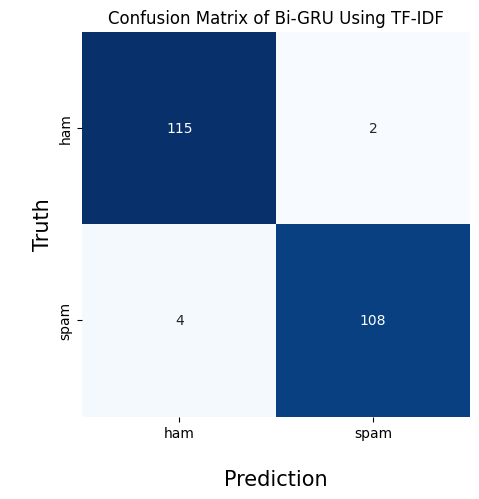

In [ ]:
cm_tfidf = confusion_matrix(y_test, result_tfidf)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of Bi-GRU Using TF-IDF")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 115 data sebagai ham, memprediksi benar 108 data sebagai spam, keliru memprediksi 4 data spam sebagai ham, dan keliru memprediksi 2 data ham sebagai spam.

In [ ]:
def predict_spam(sample_text, threshold=0.5):
    # Vectorize the sample text using TF-IDF vectorizer
    # Pass sample_text directly as a string, not as a single-element list
    sample_seq = tfidf_vectorizer.transform([sample_text])
    padded = pad_sequences(sample_seq.toarray(), maxlen=sample_seq.shape[1])

    # Reshape the input to match the expected shape (None, 1, 709)
    padded = padded.reshape(padded.shape[0], 1, padded.shape[1]) # Add this line to reshape the input

    # Predict using the loaded TF-IDF + Bi-GRU model
    prediction = model_tfidf_bigru.predict(padded)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction > threshold:
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "Kalau nanti masuk air, tolong ditutup pakai kain" # Pass a string
predict_spam(predict_msg)

1/1 [==============================] - 0s 50ms/step


'Ham'

## Doc2Vec

### Architecture Modeling

In [ ]:
# Bi-GRU for Doc2Vec
model_doc2vec_bigru = Sequential()
model_doc2vec_bigru.add(Bidirectional(GRU(128, return_sequences=True), input_shape=(None, doc2vec_dim)))
model_doc2vec_bigru.add(Dropout(0.5))
model_doc2vec_bigru.add(Bidirectional(GRU(64, return_sequences=True)))
model_doc2vec_bigru.add(Dropout(0.5))
model_doc2vec_bigru.add(Bidirectional(GRU(32)))
model_doc2vec_bigru.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_doc2vec_bigru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model_doc2vec_bigru.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirecti  (None, None, 256)         176640    
 onal)                                                           
                                                                 
 dropout_36 (Dropout)        (None, None, 256)         0         
                                                                 
 bidirectional_8 (Bidirecti  (None, None, 128)         123648    
 onal)                                                           
                                                                 
 dropout_37 (Dropout)        (None, None, 128)         0         
                                                                 
 bidirectional_9 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                     

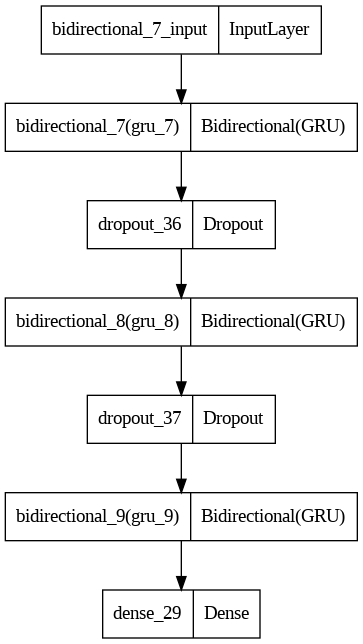

In [ ]:
from keras.utils import plot_model
plot_model(model_doc2vec_bigru, to_file='model_bigru_doc2vec.png')

model ini meliputi tiga lapisan GRU bidirectional dengan masing-masing 128, 64, dan 32 unit. Setiap lapisan diikuti oleh lapisan dropout untuk meningkatkan generalization. Lapisan dense terakhir dengan fungsi aktivasi sigmoid mengklasifikasikan teks input, apakah termasuk ke dalam kategori Spam atau Ham.


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_doc2vec_bigru = model_doc2vec_bigru.fit(x_train_doc2vec[:, np.newaxis, :], y_train, epochs=10,
                                               validation_data=(x_test_doc2vec[:, np.newaxis, :], y_test),
                                               callbacks=[early_stop], verbose=2)

Epoch 1/10
29/29 - 0s - loss: 0.5966 - accuracy: 0.6761 - val_loss: 0.6465 - val_accuracy: 0.6245 - 403ms/epoch - 14ms/step
Epoch 2/10
29/29 - 0s - loss: 0.5910 - accuracy: 0.6827 - val_loss: 0.6764 - val_accuracy: 0.6026 - 361ms/epoch - 12ms/step
Epoch 3/10
29/29 - 0s - loss: 0.5936 - accuracy: 0.6969 - val_loss: 0.6450 - val_accuracy: 0.6114 - 342ms/epoch - 12ms/step
Epoch 4/10
29/29 - 0s - loss: 0.6143 - accuracy: 0.6751 - val_loss: 0.6485 - val_accuracy: 0.6114 - 324ms/epoch - 11ms/step
Epoch 5/10
29/29 - 0s - loss: 0.5886 - accuracy: 0.6772 - val_loss: 0.6565 - val_accuracy: 0.6070 - 363ms/epoch - 13ms/step


### Model Evaluation

In [ ]:
# Evaluate the Doc2Vec LSTM model
loss_bigru_doc2vec, accuracy_bigru_doc2vec = model_doc2vec_bigru.evaluate(x_test_doc2vec[:, np.newaxis, :], y_test)  # Reshape x_test_doc2vec
print(f'Test Loss: {loss_bigru_doc2vec}')
print(f'Test Accuracy: {accuracy_bigru_doc2vec}')

8/8 [==============================] - 0s 7ms/step - loss: 0.6565 - accuracy: 0.6070
Test Loss: 0.6564745306968689
Test Accuracy: 0.6069868803024292


In [ ]:
# Extract accuracy and loss values
train_acc_doc2vec = history_doc2vec_bigru.history['accuracy']
train_loss_doc2vec = history_doc2vec_bigru.history['loss']
val_loss_doc2vec = history_doc2vec_bigru.history['val_loss']
val_acc_doc2vec = history_doc2vec_bigru.history['val_accuracy']
epoch_doc2vec = [i + 1 for i in range(len(train_acc_doc2vec))]

# Create DataFrame for accuracy and loss
acc_loss_df_doc2vec = pd.DataFrame({"Training Loss": train_loss_doc2vec,
                                    "Validation Loss": val_loss_doc2vec,
                                    "Train Accuracy": train_acc_doc2vec,
                                    "Validation Accuracy": val_acc_doc2vec,
                                    "Epoch": epoch_doc2vec})
acc_loss_df_doc2vec.style.bar()

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.596639,0.646504,0.676149,0.624454,1
1,0.591002,0.676372,0.682713,0.602620,2
2,0.593606,0.644953,0.696937,0.611354,3
3,0.614304,0.648497,0.675055,0.611354,4
4,0.588625,0.656475,0.677243,0.606987,5


In [ ]:
# Plot training vs validation accuracy
fig_doc2vec = go.Figure()

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Train Accuracy'],
                                 mode='lines+markers',
                                 name='Training Accuracy'))

fig_doc2vec.add_trace(go.Scatter(x=acc_loss_df_doc2vec['Epoch'],
                                 y=acc_loss_df_doc2vec['Validation Accuracy'],
                                 mode='lines+markers',
                                 name='Validation Accuracy'))

fig_doc2vec.update_layout(title={'text': "<b>Training Accuracy Vs Validation Accuracy (Doc2Vec)</b>\n",
                                 'xanchor': 'center',
                                 'yanchor': 'top',
                                 'y': 0.9, 'x': 0.5,},
                          xaxis_title="Epoch",
                          yaxis_title="Accuracy",
                          title_font=dict(size=20),
                          yaxis=dict(range=[0, 1.0]))

fig_doc2vec.layout.template = 'plotly_dark'
fig_doc2vec.show()

Model Bi-GRU dengan metode text representation Doc2Vec menghasilkan akurasi sebesar 60.70% dan loss sebesar 0.66 ketika digunakan untuk memprediksi data testing. Baik akurasi pelatihan maupun akurasi validasi menunjukkan tidak adanya peningkatan, mengindikasikan bahwa model tidak belajar dari data. Plot validation accuracy dan training accuracy menunjukkan adanya underfitting akibat arsitektur model yang terlalu sederhana karena terlihat akurasi tidak bertambah. Proses training berhenti di epoch ke lima karena early stopping menghentikan training di tengah proses.

In [ ]:
# Classification report and confusion matrix for Doc2Vec model
threshold = 0.5

# Reshape x_test_doc2vec to include sequence length dimension
result_doc2vec = model_doc2vec_bigru.predict(x_test_doc2vec[:, np.newaxis, :], verbose=2)
result_doc2vec = (result_doc2vec > threshold).astype("int32")

8/8 - 2s - 2s/epoch - 264ms/step


In [ ]:
print(classification_report(y_test, result_doc2vec, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.61      0.64      0.62       117
        spam       0.60      0.57      0.59       112

    accuracy                           0.61       229
   macro avg       0.61      0.61      0.61       229
weighted avg       0.61      0.61      0.61       229



Dari nilai precision ham yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai ham, 61% memang benar merupakan ham. Dari nilai recall ham yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya ham, 64% di antaranya berhasil diprediksi dengan benar sebagai ham. Dari nilai precision ham yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori ham yaitu 62%.

Dari nilai precision spam yang diperoleh, dapat diartikan bahwa dari semua data yang diprediksi sebagai spam, 60% memang benar merupakan spam. Dari nilai recall spam yang diperoleh, dapat diartikan bahwa dari semua data yang sebenarnya spam, 57% di antaranya berhasil diprediksi dengan benar sebagai spam. Dari nilai precision spam yang diperoleh, dapat diartikan bahwa rerata dari nilai precision dan recall untuk kategori spam yaitu 59%.

Secara keseluruhan, accuracy dapat diartikan bahwa dari semua data yang diprediksi, 61% di antaranya berhasil diprediksi dengan benar. Ini berarti bahwa model memiliki kemampuan yang kurang baik dalam mengklasifikasikan data dengan benar secara keseluruhan.


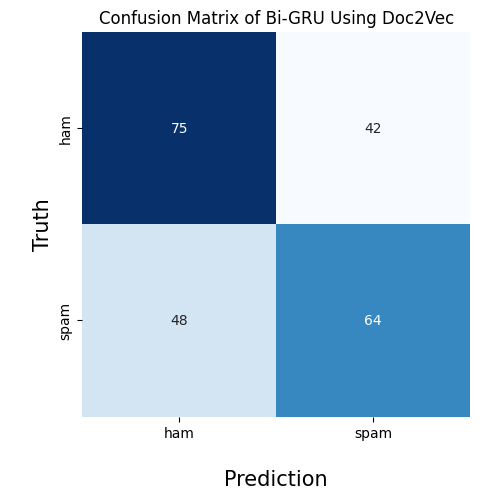

In [ ]:
cm_doc2vec = confusion_matrix(y_test, result_doc2vec)
classes = ['ham', 'spam']

plt.figure(figsize=(5, 5))
sns.heatmap(cm_doc2vec, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("\nPrediction", size=15)
plt.ylabel("\nTruth", size=15)
plt.title("Confusion Matrix of Bi-GRU Using Doc2Vec")
plt.show()

Confusion matrix mengindikasikan bahwa model memprediksi benar 75 data sebagai ham, memprediksi benar 64 data sebagai spam, keliru memprediksi 48 data spam sebagai ham, dan keliru memprediksi 42 data ham sebagai spam.

In [ ]:
def predict_spam_doc2vec(sample_text, threshold=0.5):
    # Infer document vector for the sample text
    sample_vector = d2v_model.infer_vector(word_tokenize(sample_text.lower()))

    # Reshape the input to match the expected shape (None, 1, doc2vec_dim)
    sample_vector = sample_vector.reshape(1, 1, -1)

    # Predict using the Doc2Vec + LSTM model
    prediction = model_doc2vec_bigru.predict(sample_vector)[0][0]

    # Classify as spam or ham based on the prediction probability
    if prediction > threshold:
        return "Spam"
    else:
        return "Ham"

# Example usage
predict_msg = "p01n yg anda puny4 sud4h terkumpul, t4kran di w4b kami"
print(predict_spam_doc2vec(predict_msg))

1/1 [==============================] - 0s 38ms/step
Spam


# Perbandingan Model

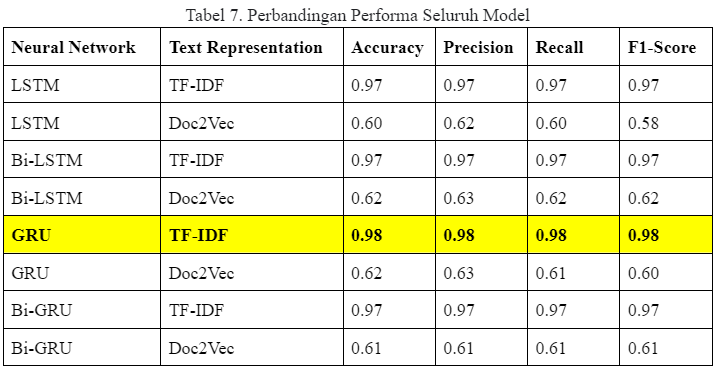

Tabel di atas merupakan tabel perbandingan performa seluruh model yang digunakan dalam penelitian ini. Model LSTM yang memiliki nilai metrik evaluasi terbaik adalah model dengan metode text representation TF-IDF. Nilai accuracy, precision, recall, dan f1-score yang diperoleh berkisar di angka 97%. Model Bi-LSTM yang memiliki nilai metrik evaluasi terbaik adalah model dengan metode text representation TF-IDF. Nilai accuracy, precision, recall, dan f1-score yang diperoleh berkisar di angka 97%. Model GRU yang memiliki nilai metrics evaluasi terbaik adalah model dengan metode text representation TF-IDF. Nilai accuracy, precision, recall, dan f1-score yang diperoleh berkisar di angka 98%. Model Bi-GRU yang memiliki nilai metrics evaluasi terbaik adalah model dengan metode text representation TF-IDF. Nilai accuracy, precision, recall, dan f1-score yang diperoleh berkisar di angka 97%. Menganalisis dari hasil keempat metrik tersebut, dapat ditarik kesimpulan bahwa TF-IDF lebih unggul dan cocok untuk kasus klasifikasi kategori SMS spam ini dibandingkan dengan Doc2Vec.

TF-IDF merepresentasikan teks dengan mempertimbangkan frekuensi kemunculan kata sehingga cocok untuk dataset dengan distribusi kata yang relevan untuk klasifikasi, dimana data SMS spam ini memiliki beberapa term tertentu yang memang mengindikasikan suatu pesan sebagai spam. Sebaliknya, Doc2Vec mengubah dokumen menjadi vektor melalui proses pelatihan neural network yang mencoba memprediksi kata berdasarkan konteks. Maka dari itu, Doc2Vec dapat menjadi kurang optimal apabila dihadapkan pada dataset dengan variasi konteks yang tinggi atau kalimat-kalimat yang tidak konsisten. Doc2Vec sulit menangkap informasi dengan baik karena dataset SMS spam ini banyak menggunakan kata-kata yang tidak baku dan penuh singkatan.

Ada pula, TF-IDF dinilai lebih efektif dan stabil untuk dataset kecil. Sedangkan Doc2Vec memerlukan dataset yang lebih besar untuk membangun vektor representasi yang akurat. Dalam hal ini, data yang digunakan cenderung kecil karena hanya berkisar di angka 1000. Oleh karena itu, metode representasi yang menghasilkan performa lebih baik untuk dataset klasifikasi SMS spam ini adalah TF-IDF.

Terakhir, model dengan metode text representation TF-IDF yang memiliki nilai metrik evaluasi terbaik adalah model GRU yang menggunakan input layer 128 unit, satu hidden layer 64 unit, dan fungsi aktivasi sigmoid untuk memprediksi output. Nilai accuracy, precision, recall, dan f1-score yang diperoleh berkisar di angka 98%.